In [2]:
# importing the required libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:

#checking head
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
# checking shape
df.shape

(32560, 15)

In [7]:
# checking datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

we can see there is no null values in the dataset

In [11]:
plt.figure(figsize=[20,15])
sns.heatmap(df.isnull(),annot = True)
plt.title('Null Values')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000027D94DD3430> (for post_execute):


KeyboardInterrupt: 

# EDA AND DATA VISUALIZATION

In [12]:
s = (df.dtypes =='object')
categorical_cols= list(s[s].index)
print('Categorical varibles:')
print(categorical_cols)

Categorical varibles:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [13]:
s= (df.dtypes == 'int64')
continuous_cols = list(s[s].index)

print('continuous varibles:')
print(continuous_cols)

continuous varibles:
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [14]:
continuous_cols.remove('Education_num')

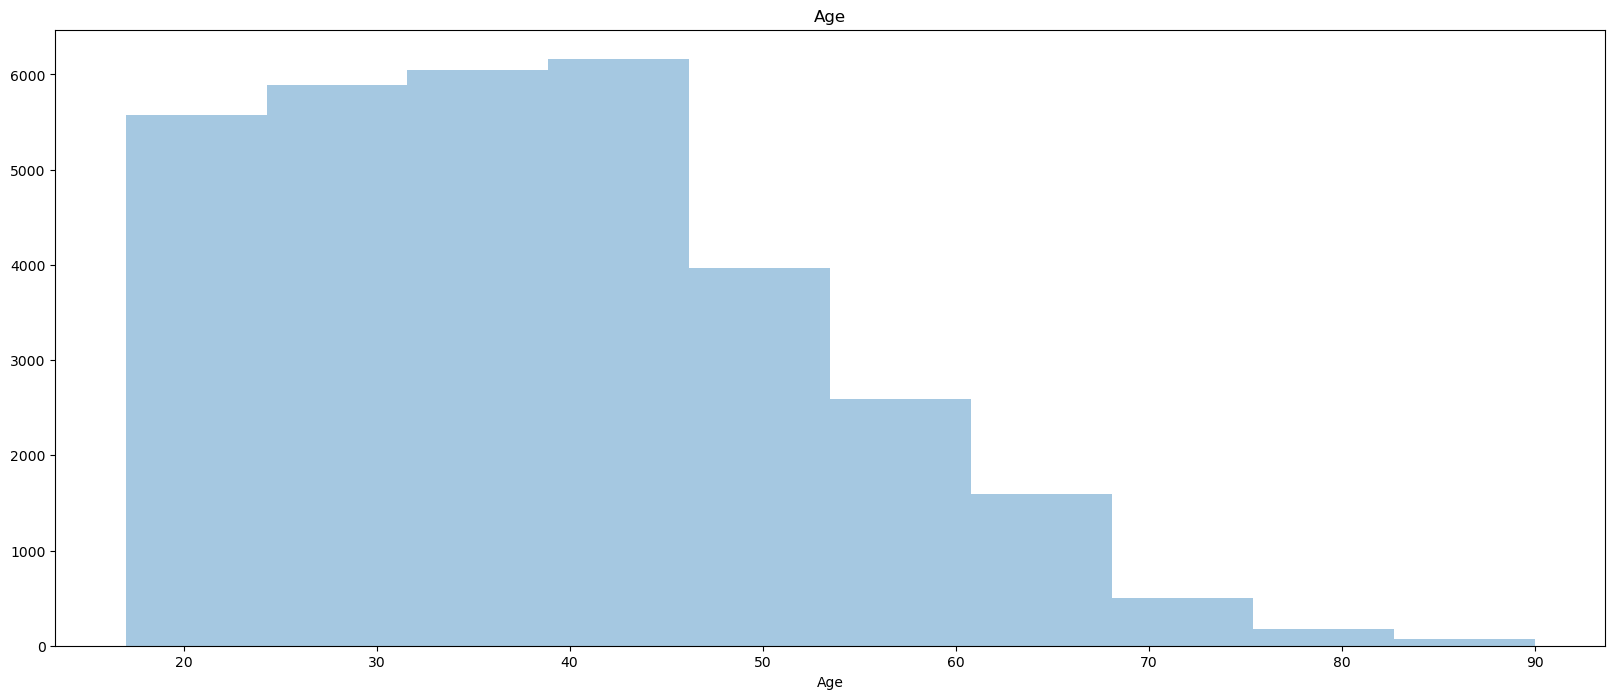

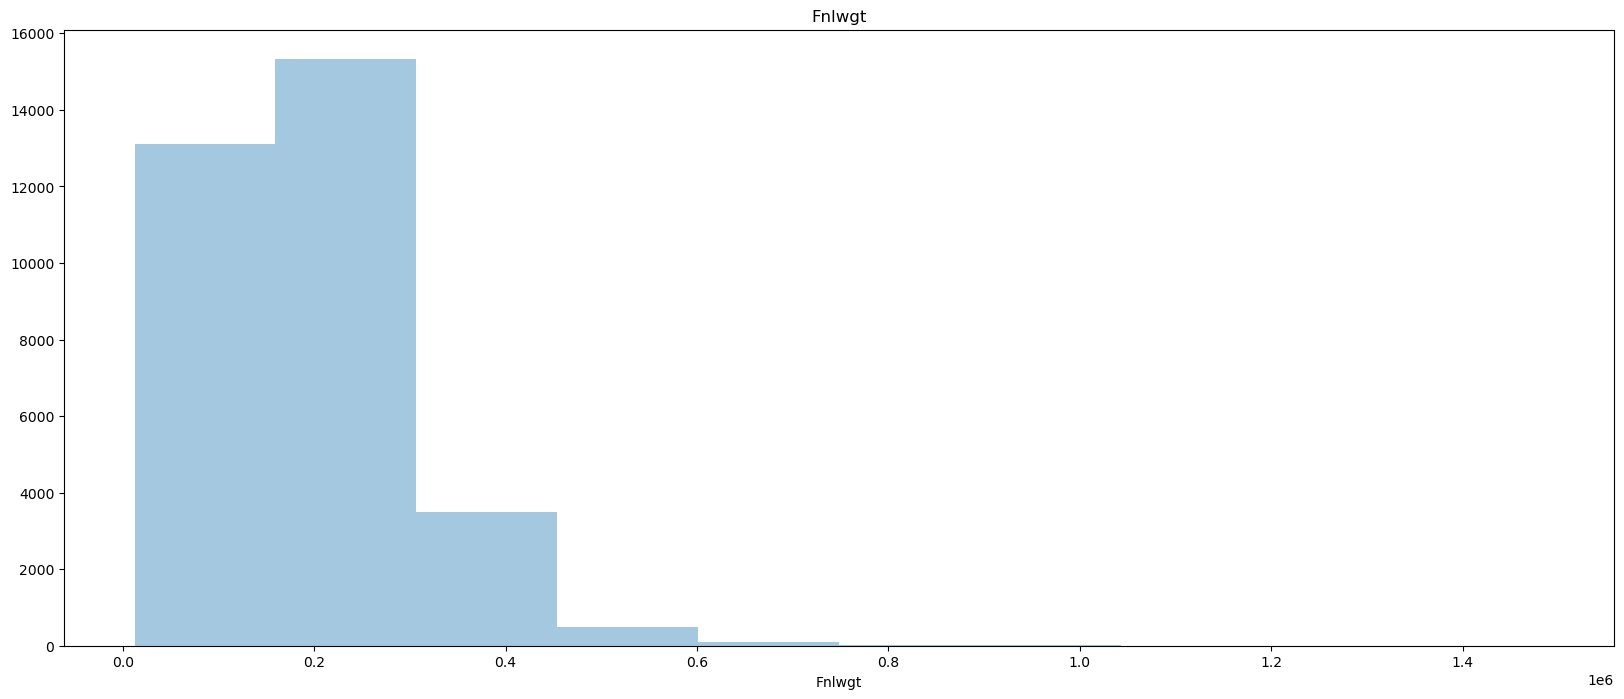

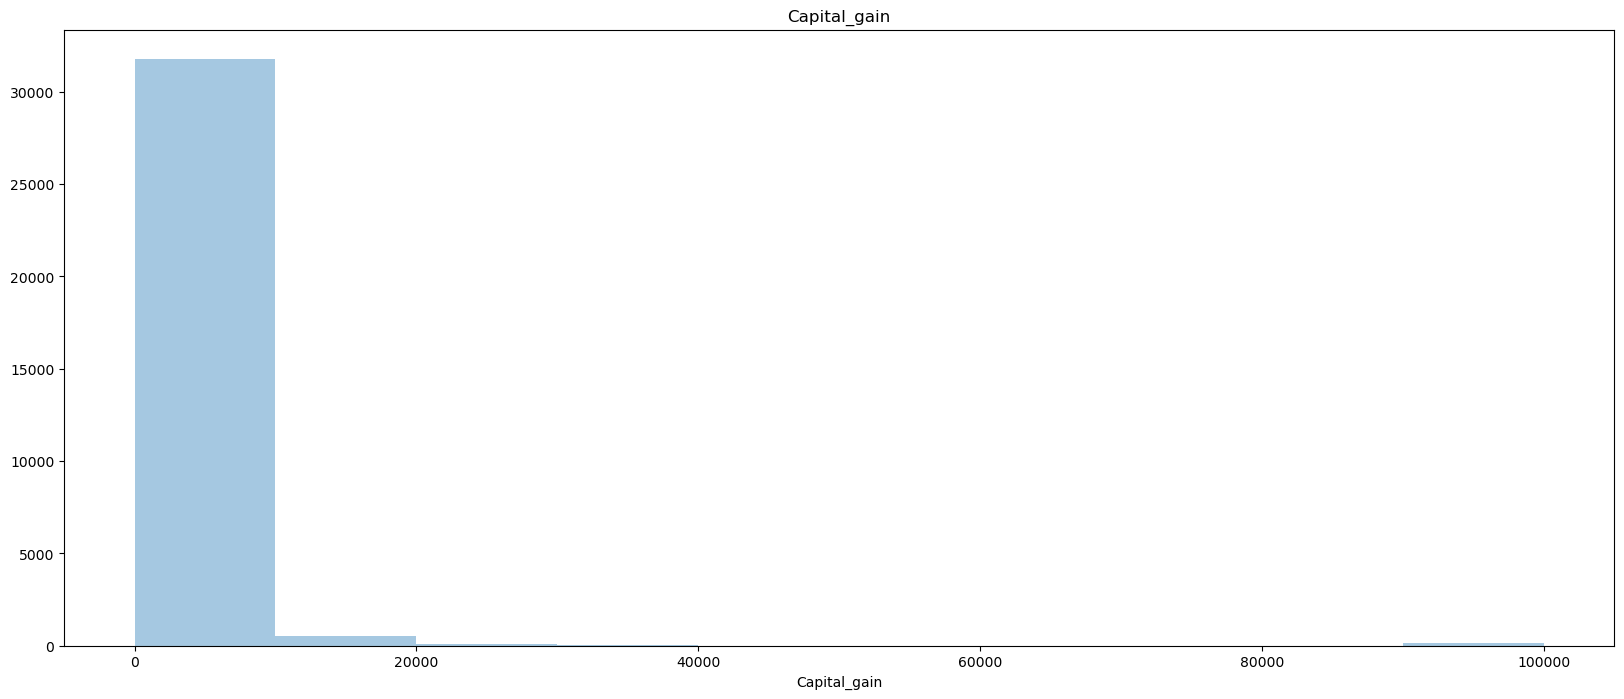

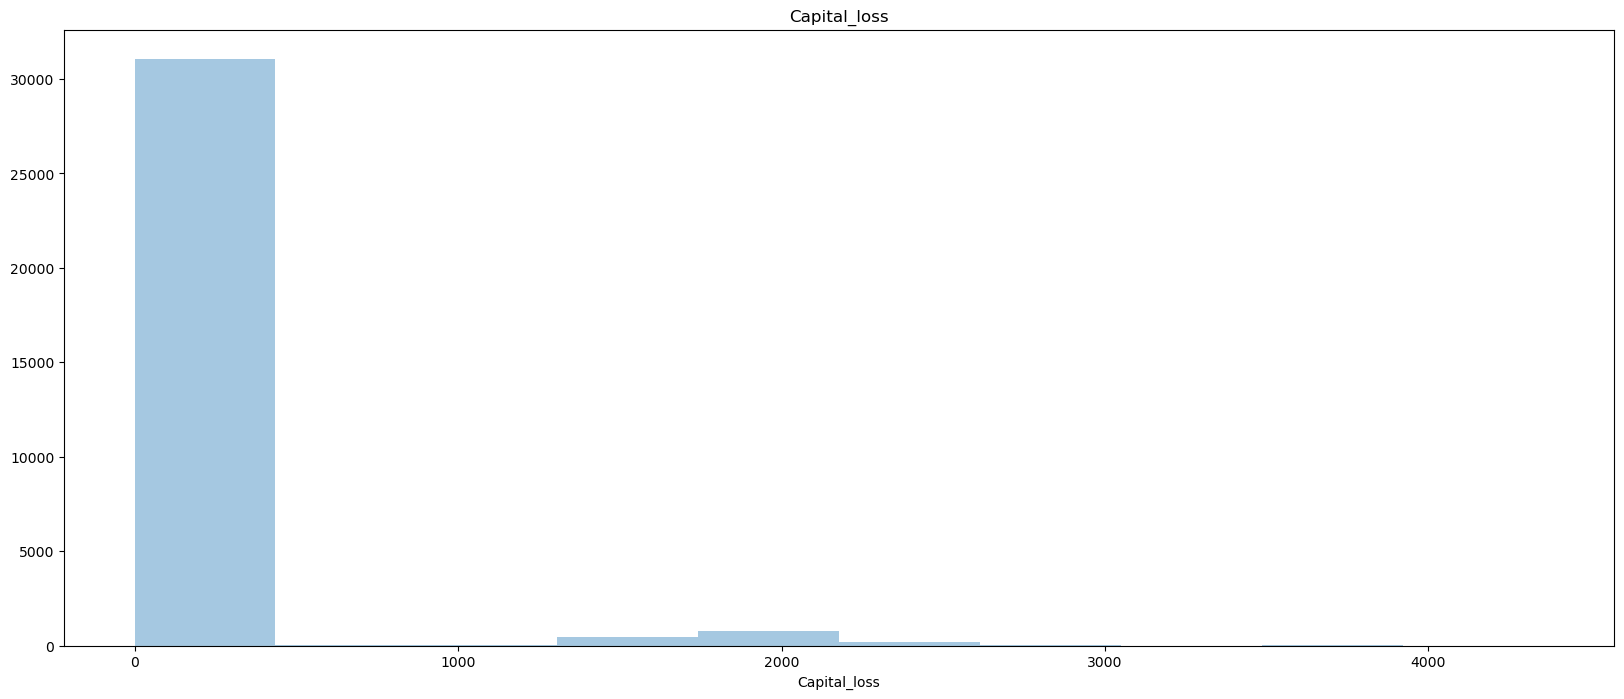

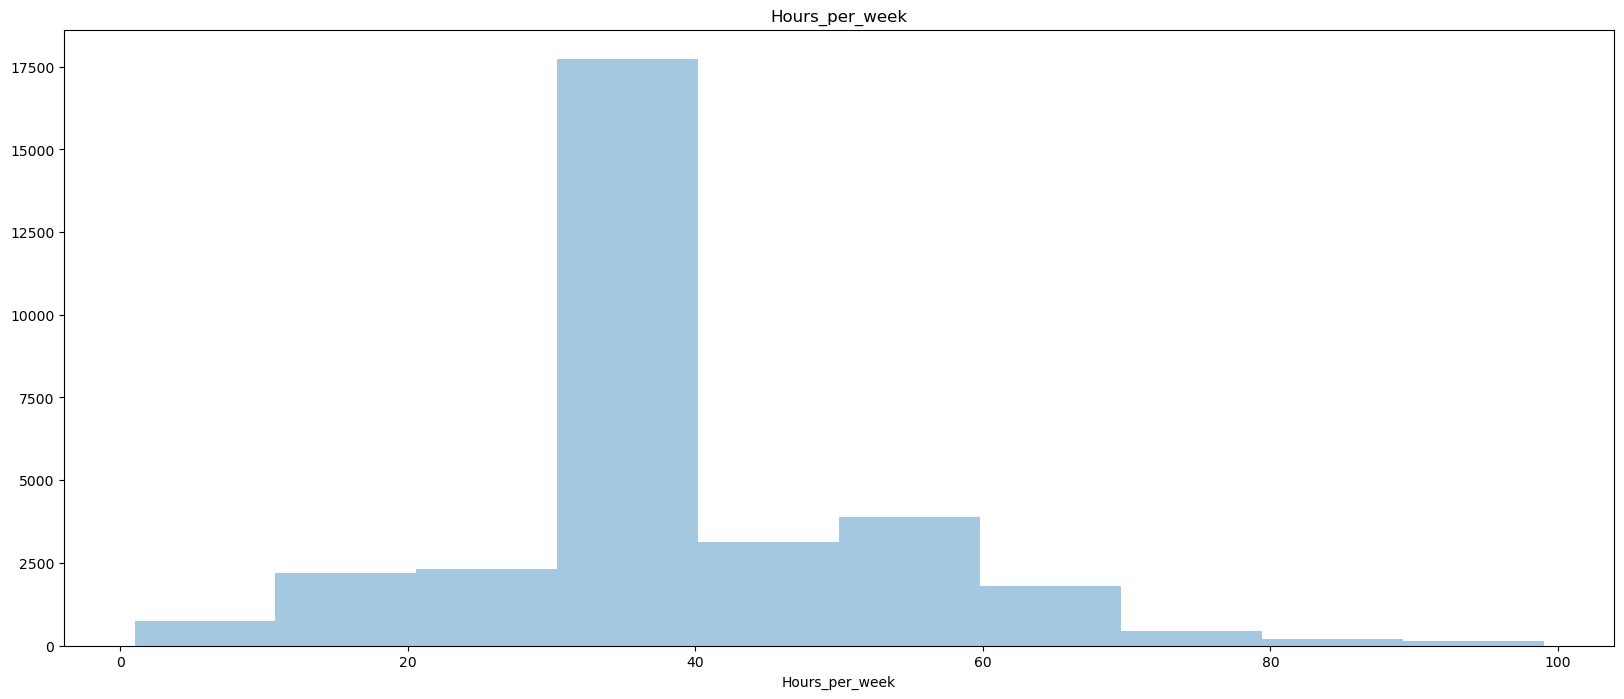

In [15]:
for i in continuous_cols:
    plt.figure(figsize=(20,8))
    sns.distplot(a = df[i], bins = 10 , kde = False)
    plt.title(i)
    plt.show()

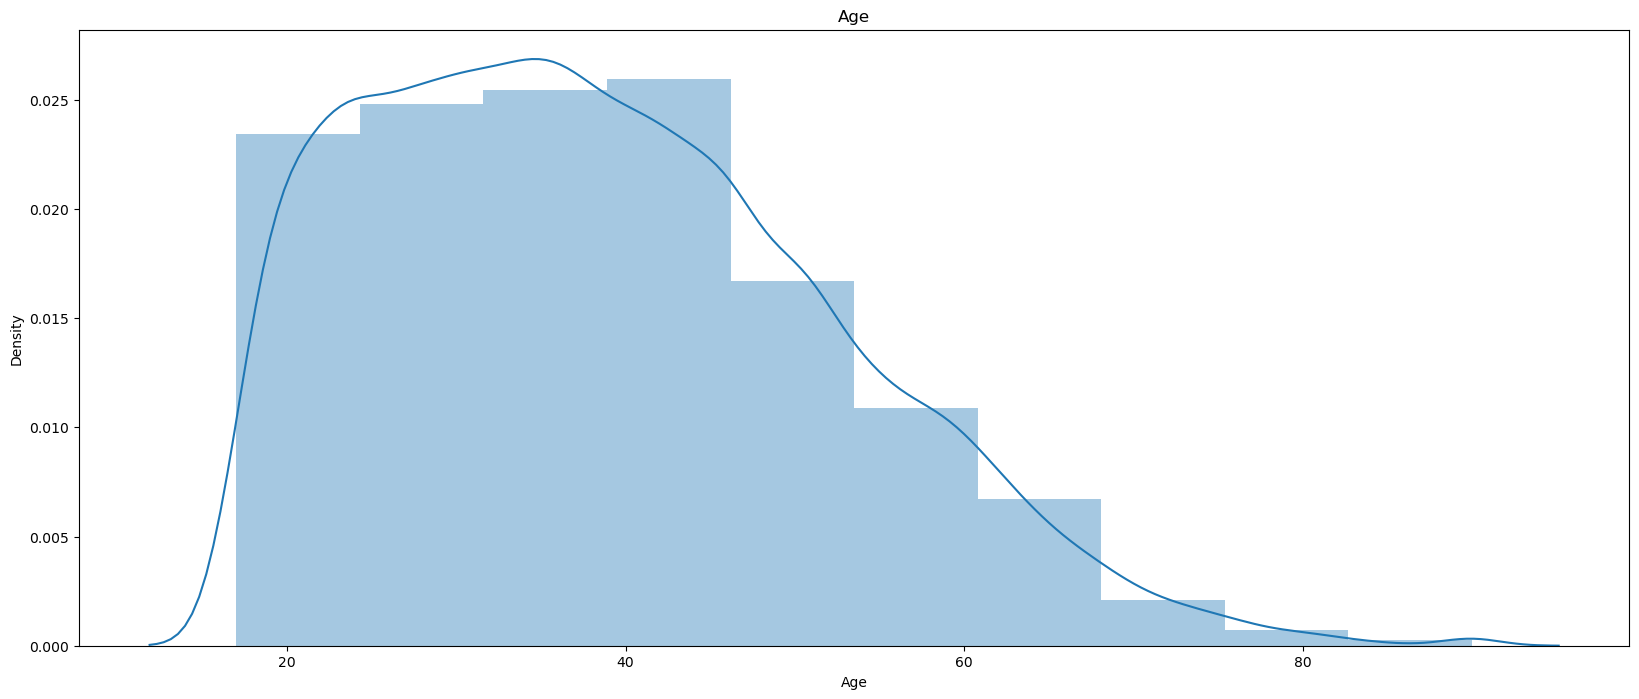

In [16]:
plt.figure(figsize=(20,8))
sns.distplot(df['Age'],bins = 10)
plt.title('Age')
plt.show()

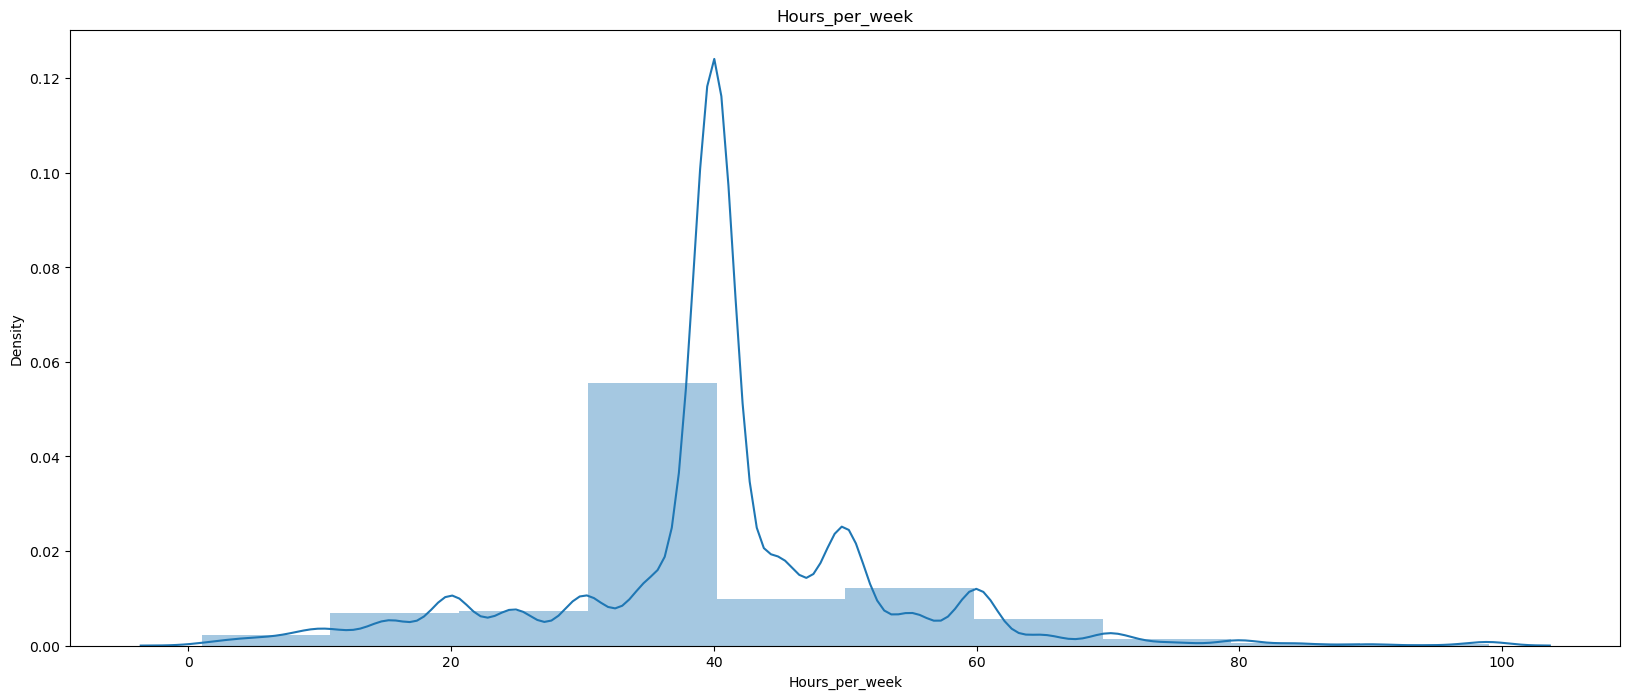

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(df['Hours_per_week'],bins = 10)
plt.title('Hours_per_week')
plt.show()

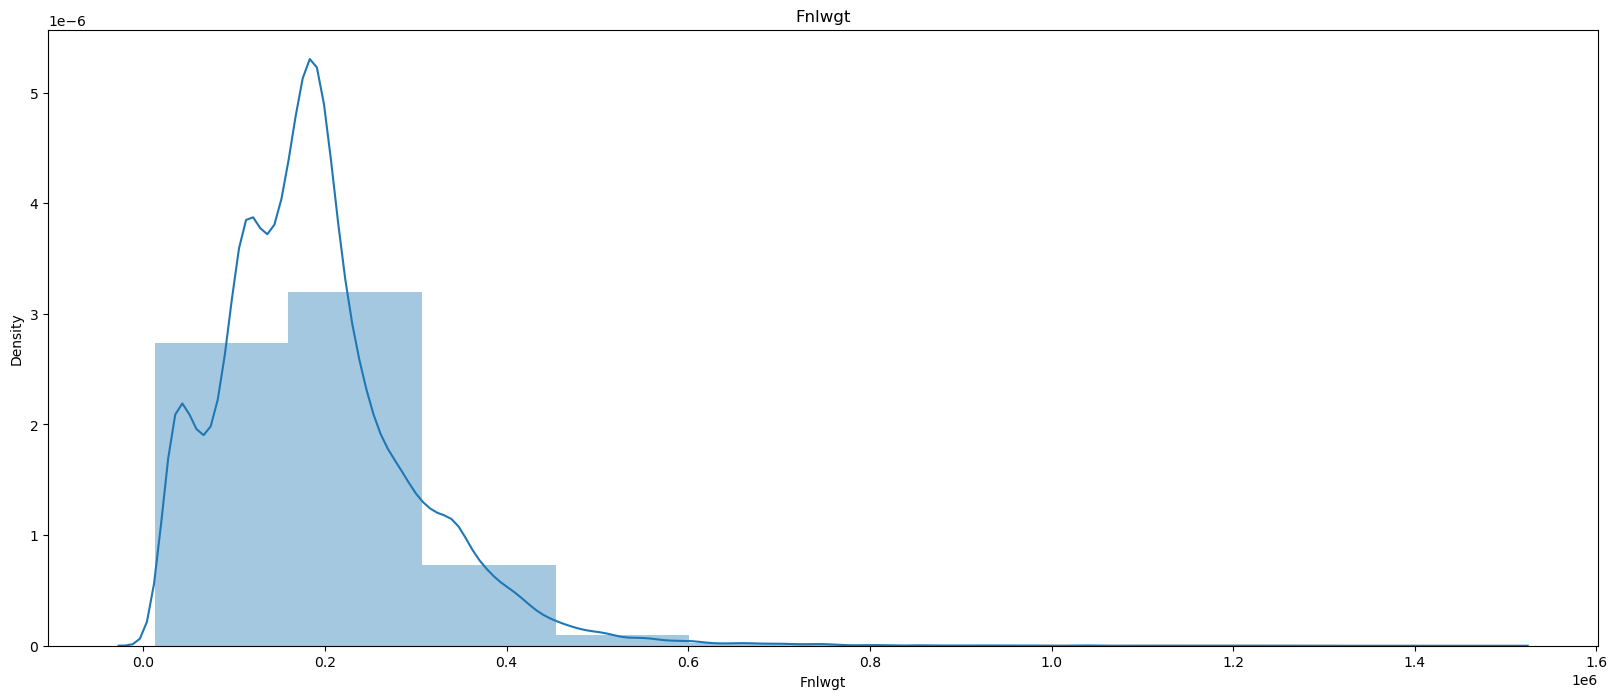

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(df['Fnlwgt'],bins = 10)
plt.title('Fnlwgt')
plt.show()

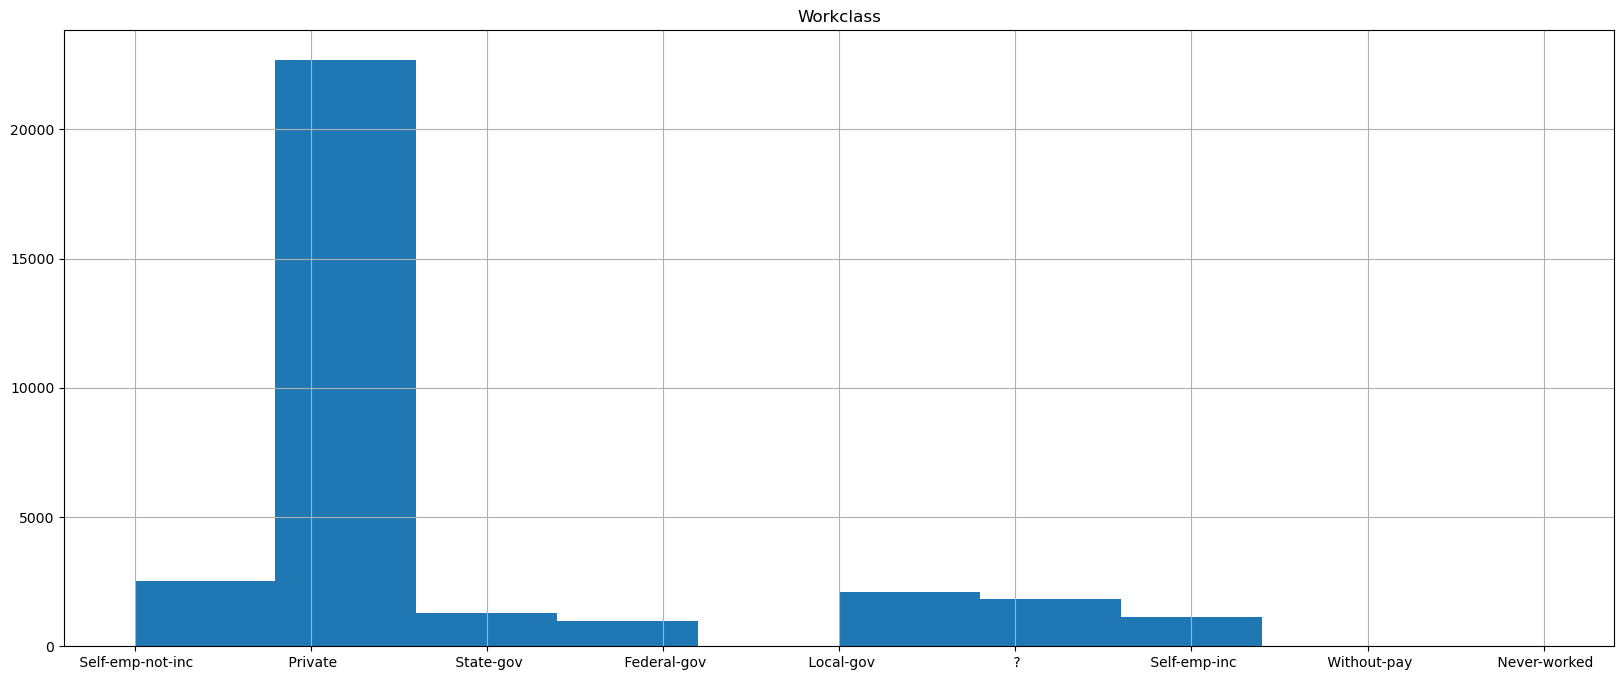

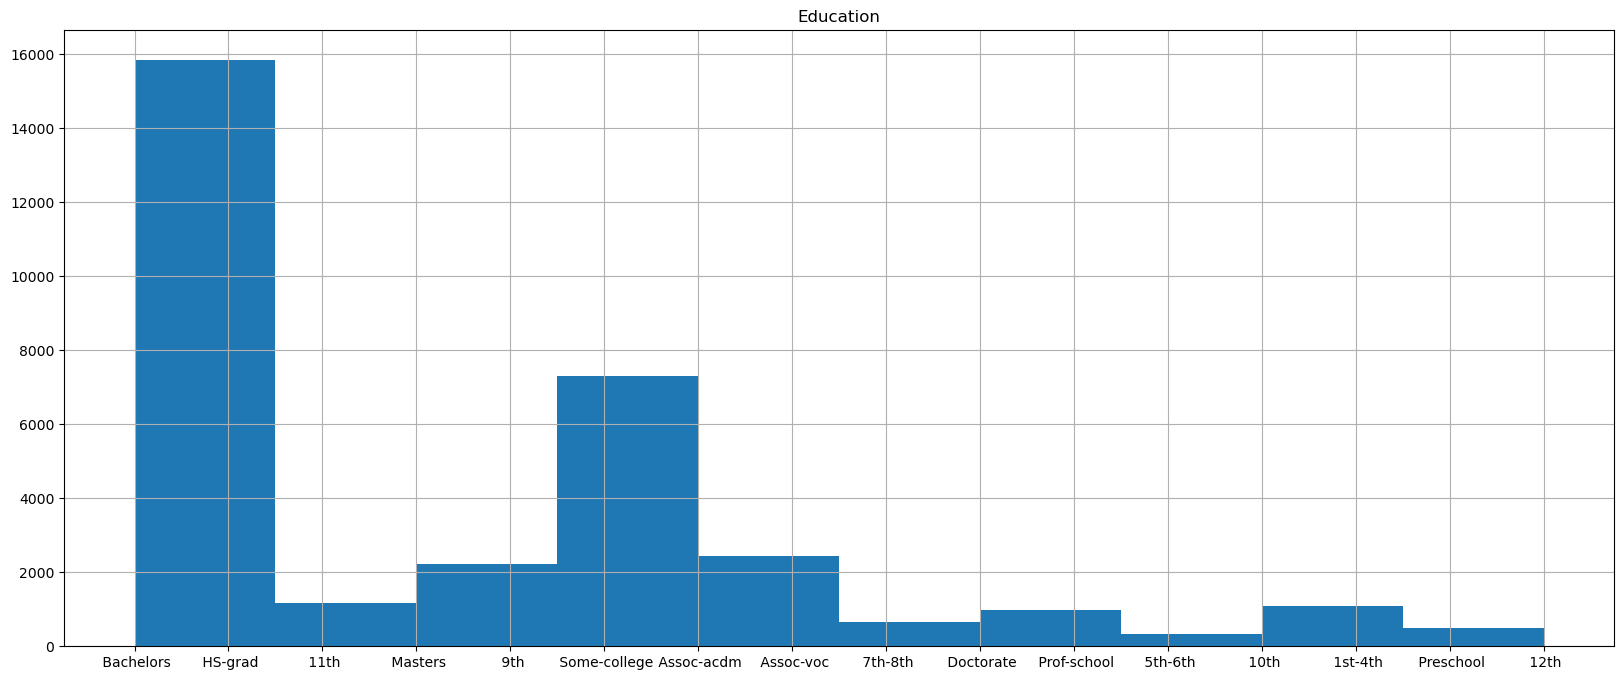

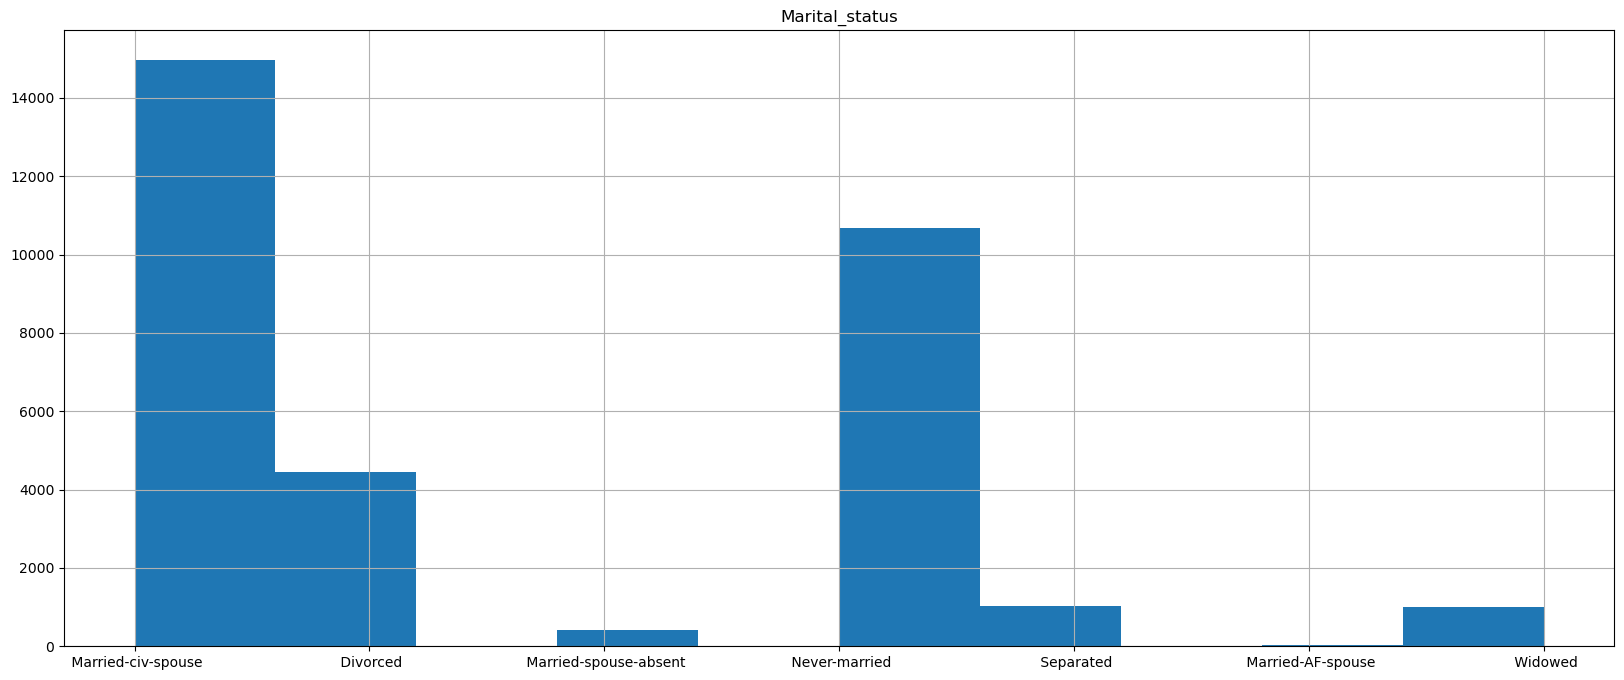

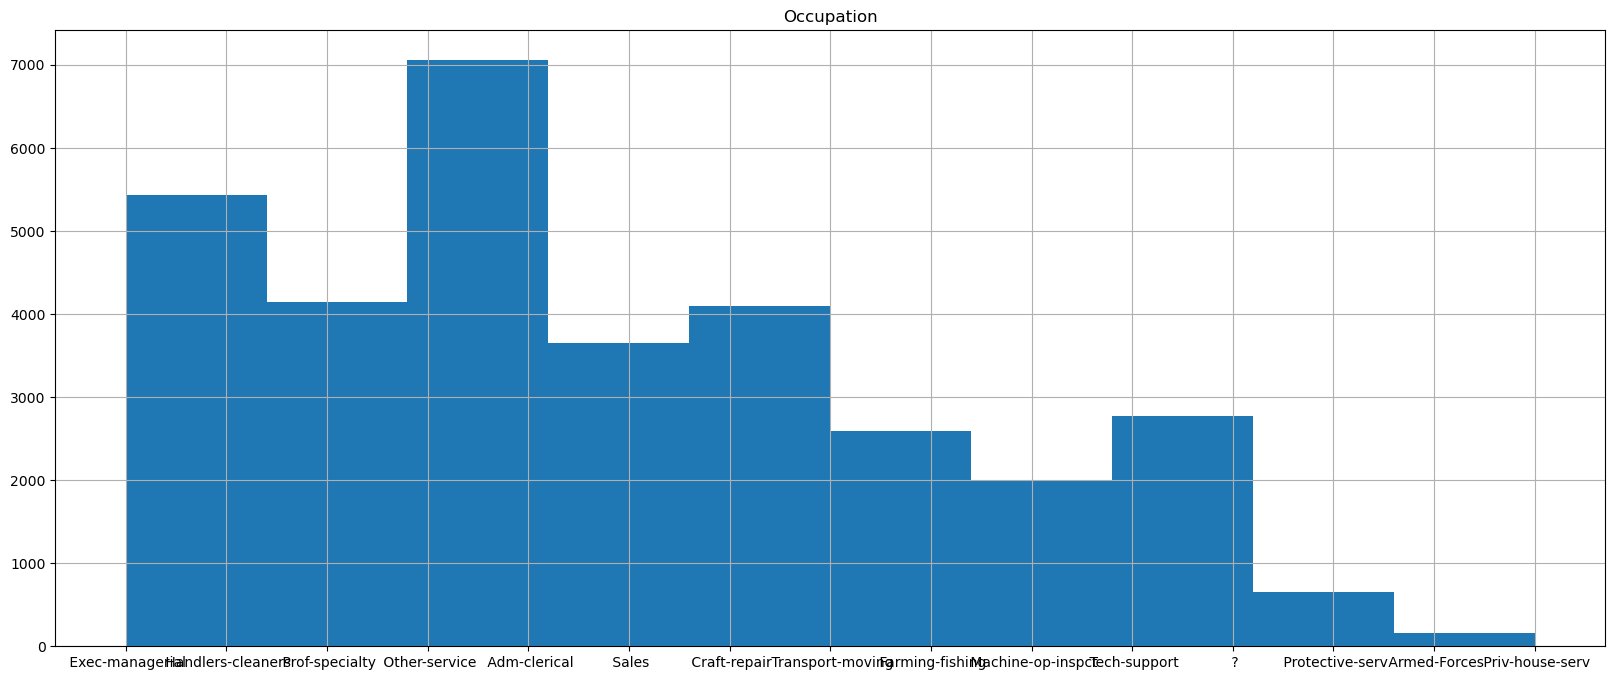

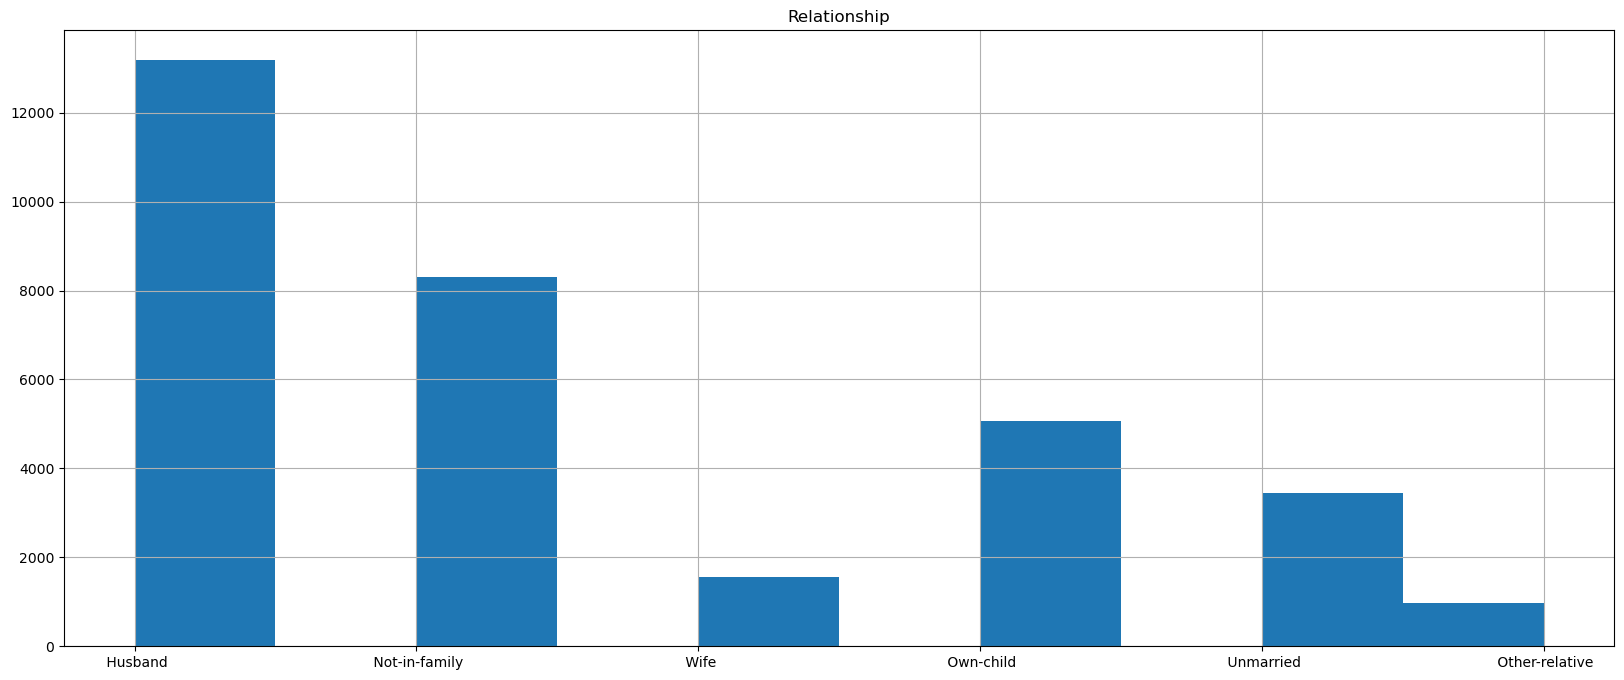

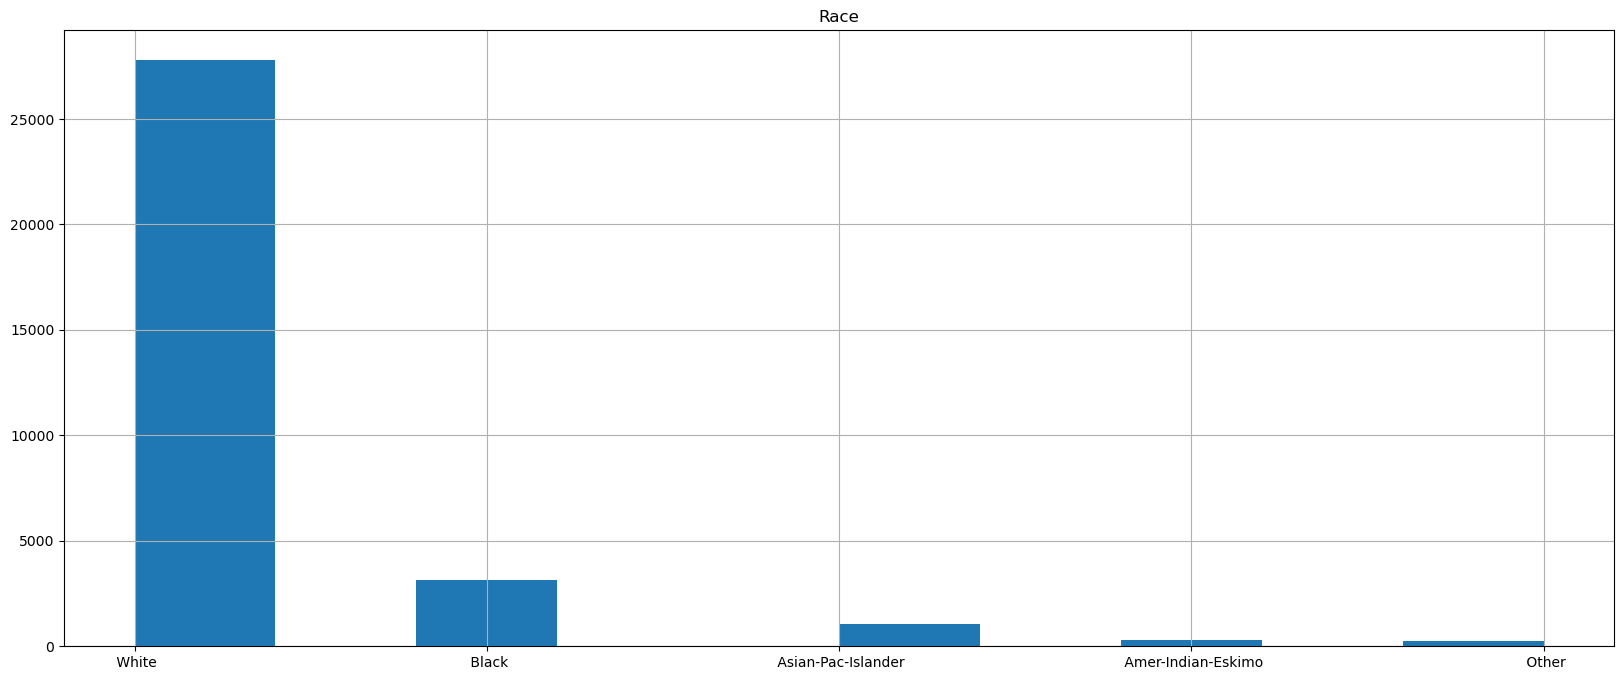

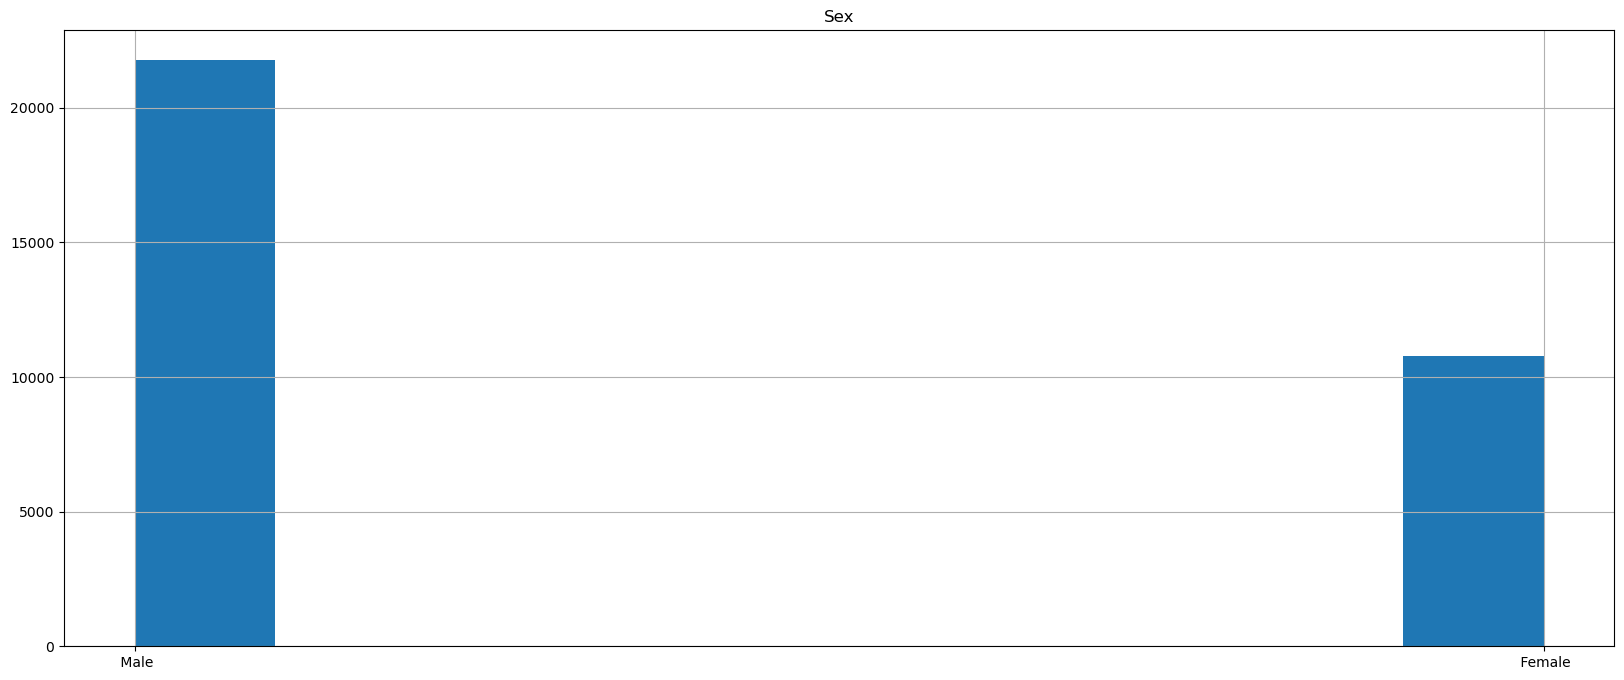

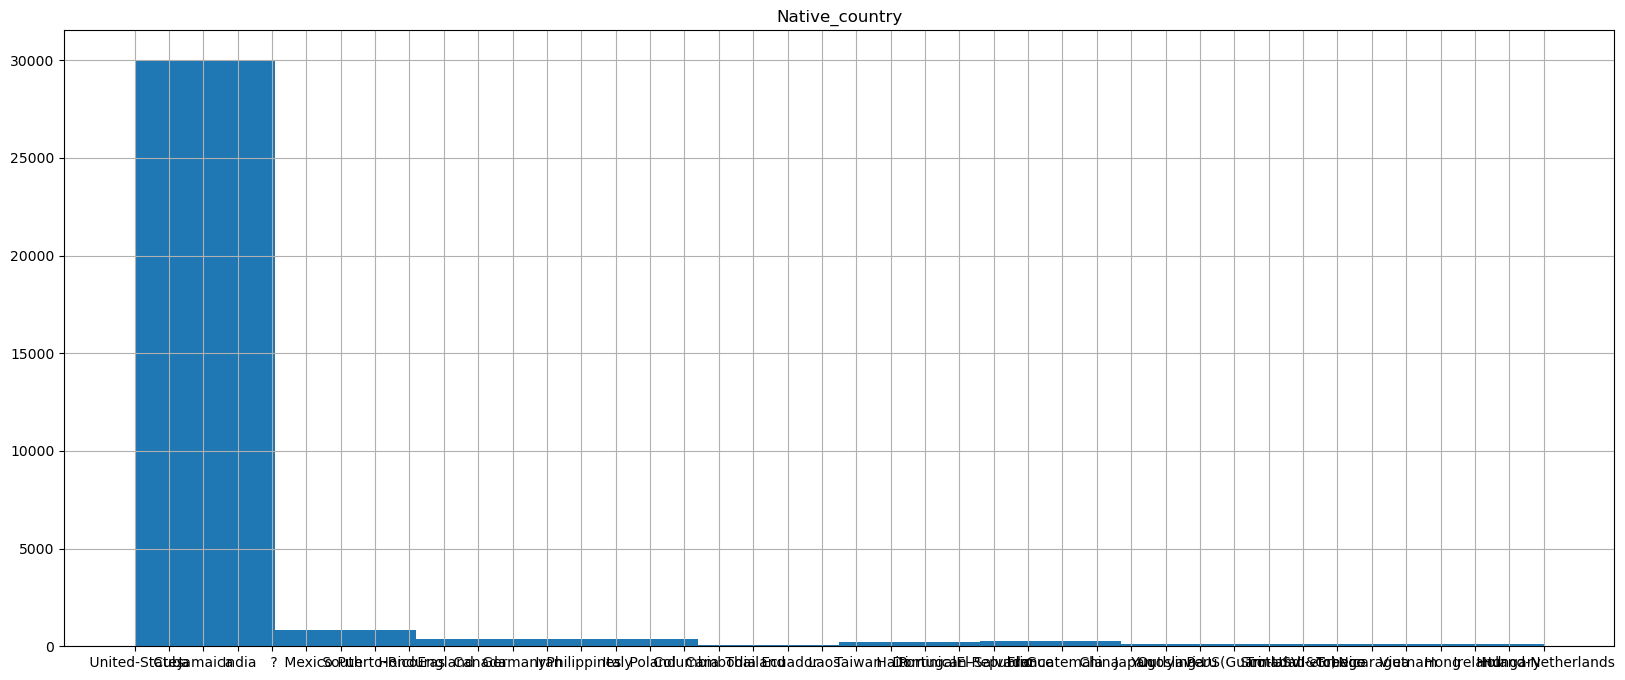

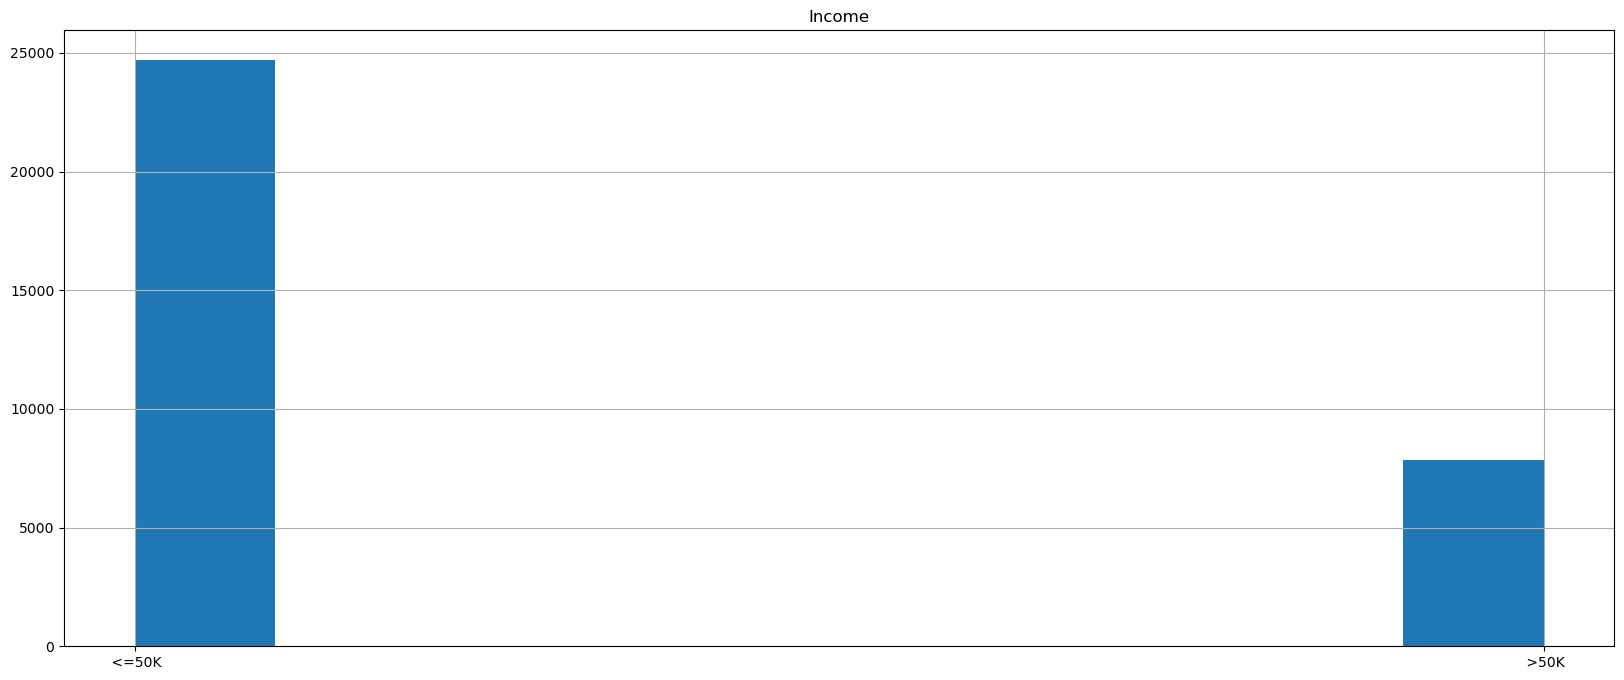

In [19]:
for i in categorical_cols:
    plt.figure(figsize=(20,8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [20]:
df.loc[df['Occupation'] == '?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [21]:
df.loc[df['Workclass'] == '?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [22]:
df.loc[(df['Workclass'] == '?') & (df['Occupation'] != '?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [23]:
df.loc[(df['Workclass'] != '?') & (df['Occupation'] == '?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [24]:
df.loc[(df['Workclass'] == '?') & (df['Occupation'] == '?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [25]:
vals = [df['Income'][df['Income'] =='>50K'].count(), df['Income'][df['Income'] == '<=50K' ].count()]
plt.figure(figsize = (15,8))
label = ['Above 50k ','Below or equal to 50k']
plt.pie (vals, labels=label, autopct = '%1.0f%%', explode=(0 , 0.1))
plt.title('Income Pie Chart')





ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1500x800 with 1 Axes>

Text(0.5, 1.0, 'Income Pie Chart')

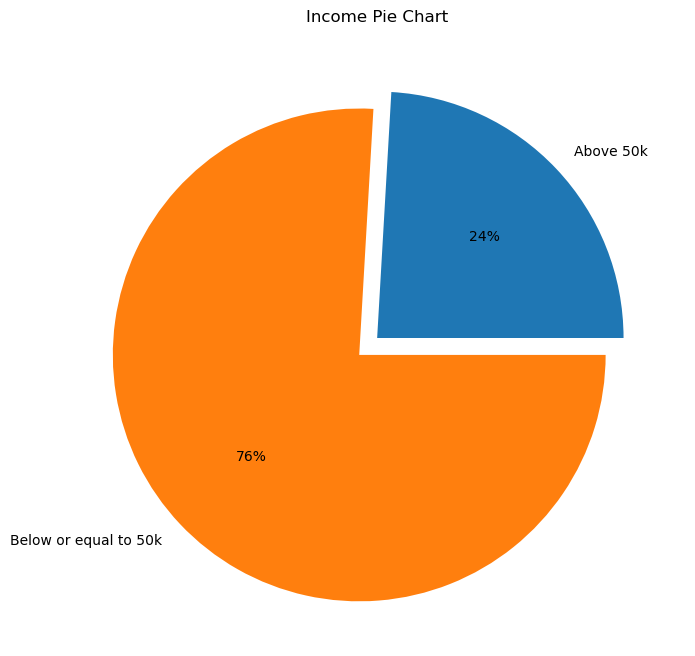

In [26]:
vals = [df['Income'][df['Income'] == ' >50K'].count() , df['Income'][df['Income'] == ' <=50K'].count()]
plt.figure(figsize = (15, 8))
label = ["Above 50k" , "Below or equal to 50k"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1))
plt.title("Income Pie Chart")


76% of people in the given dataset has income below oe equal to 50k, while only 24% are earning above 50k.

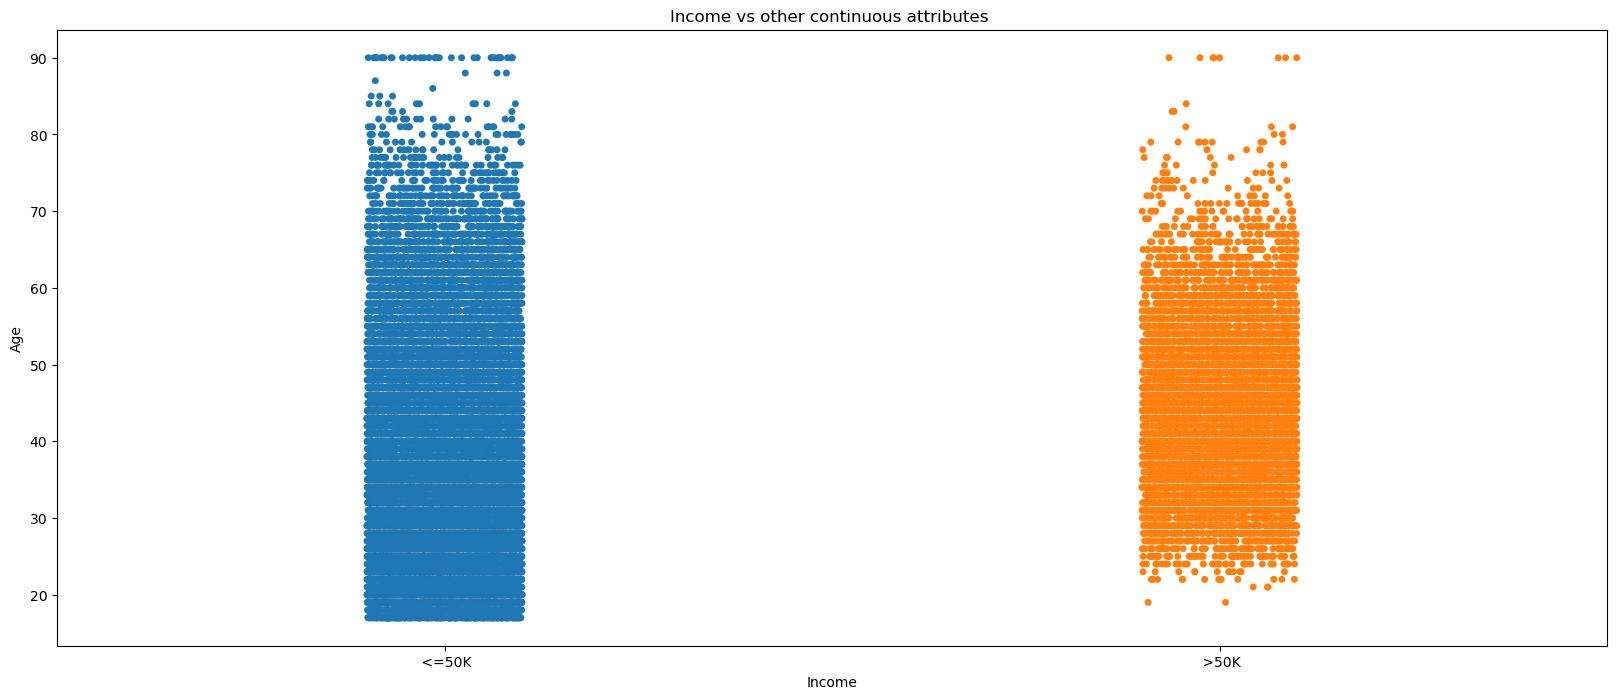

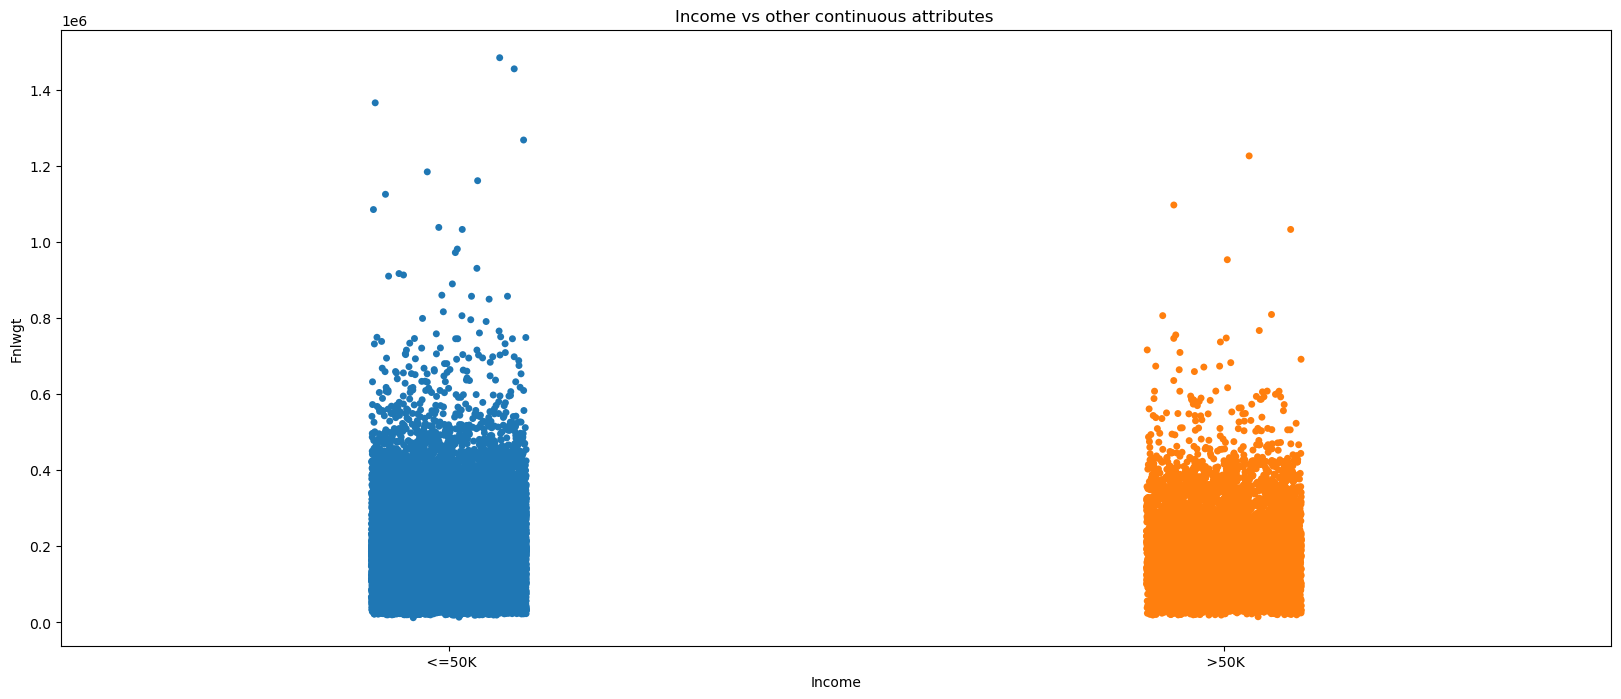

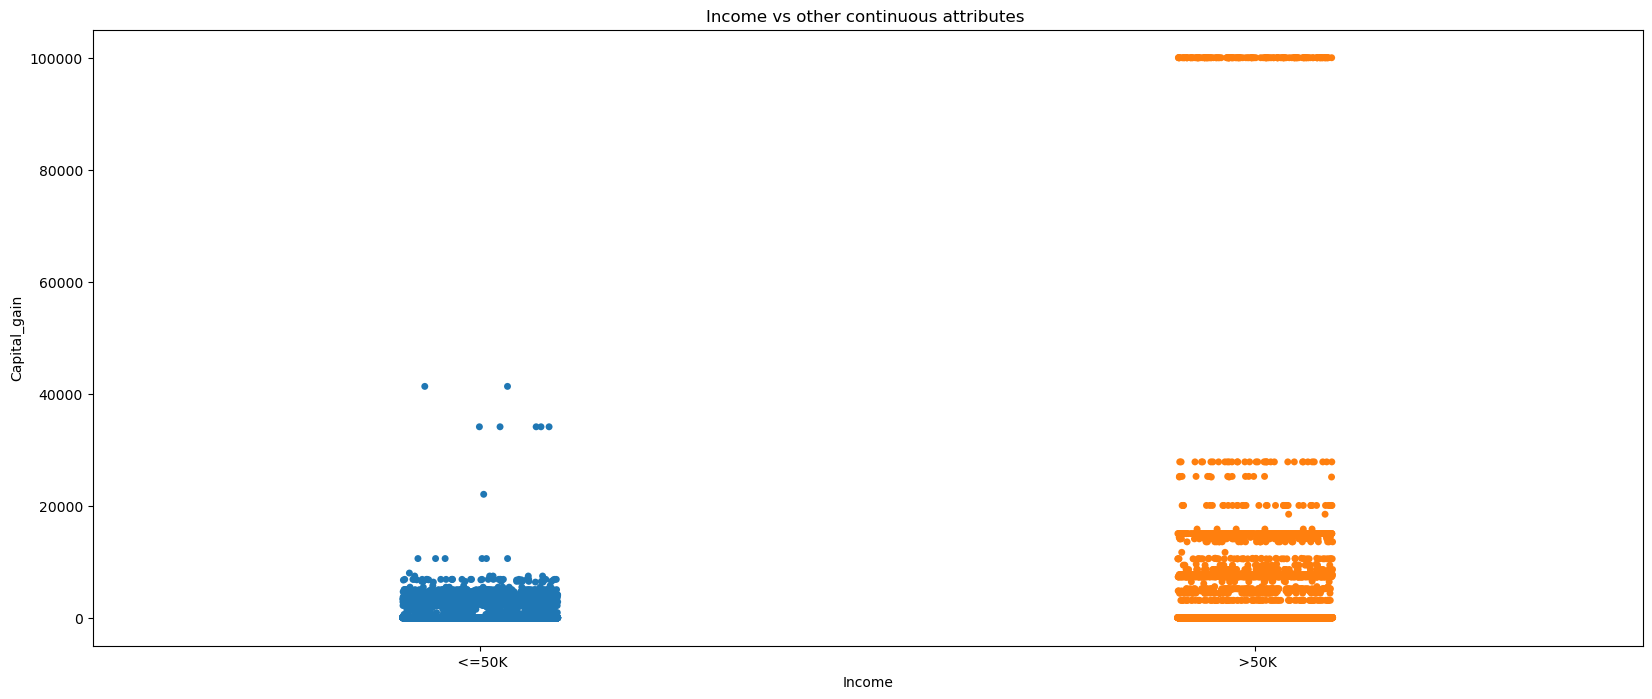

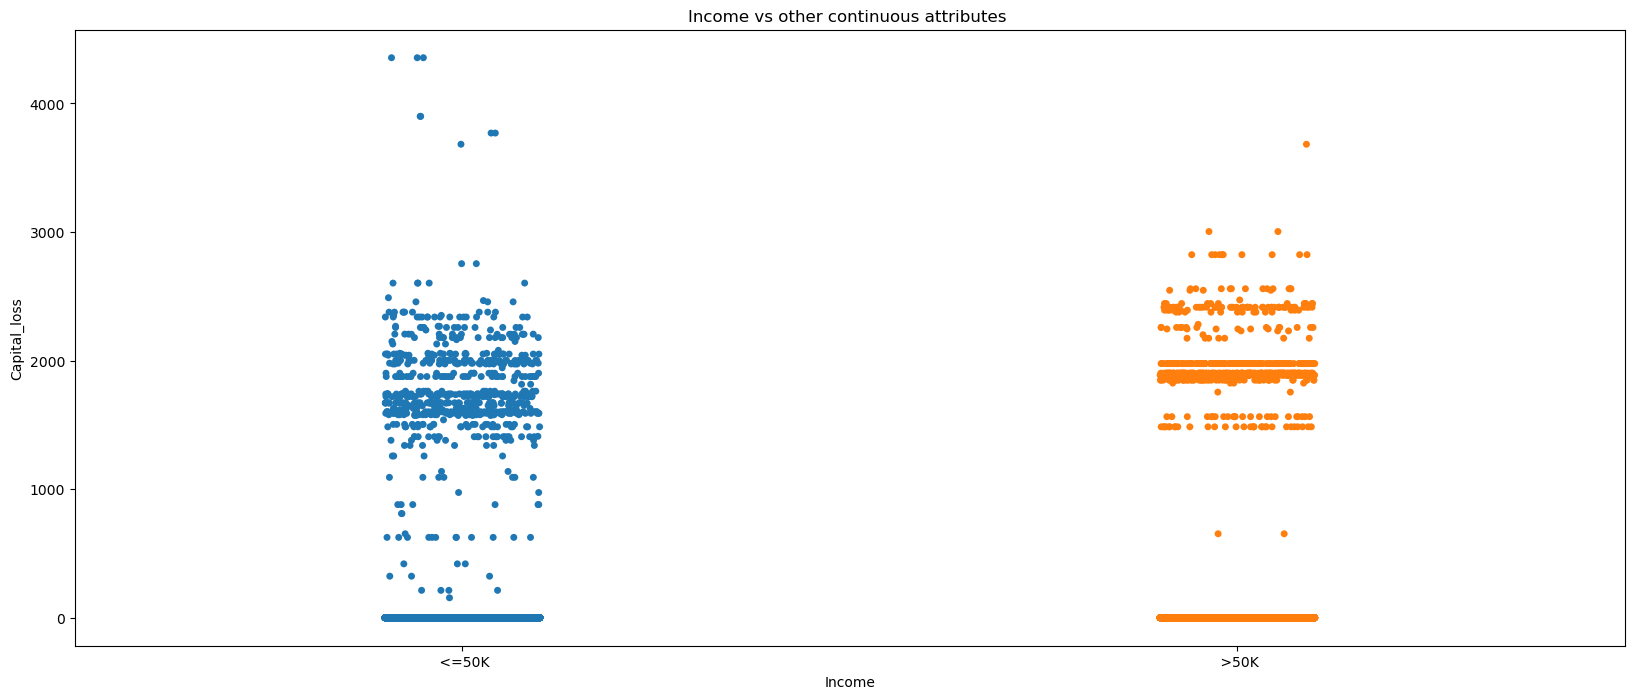

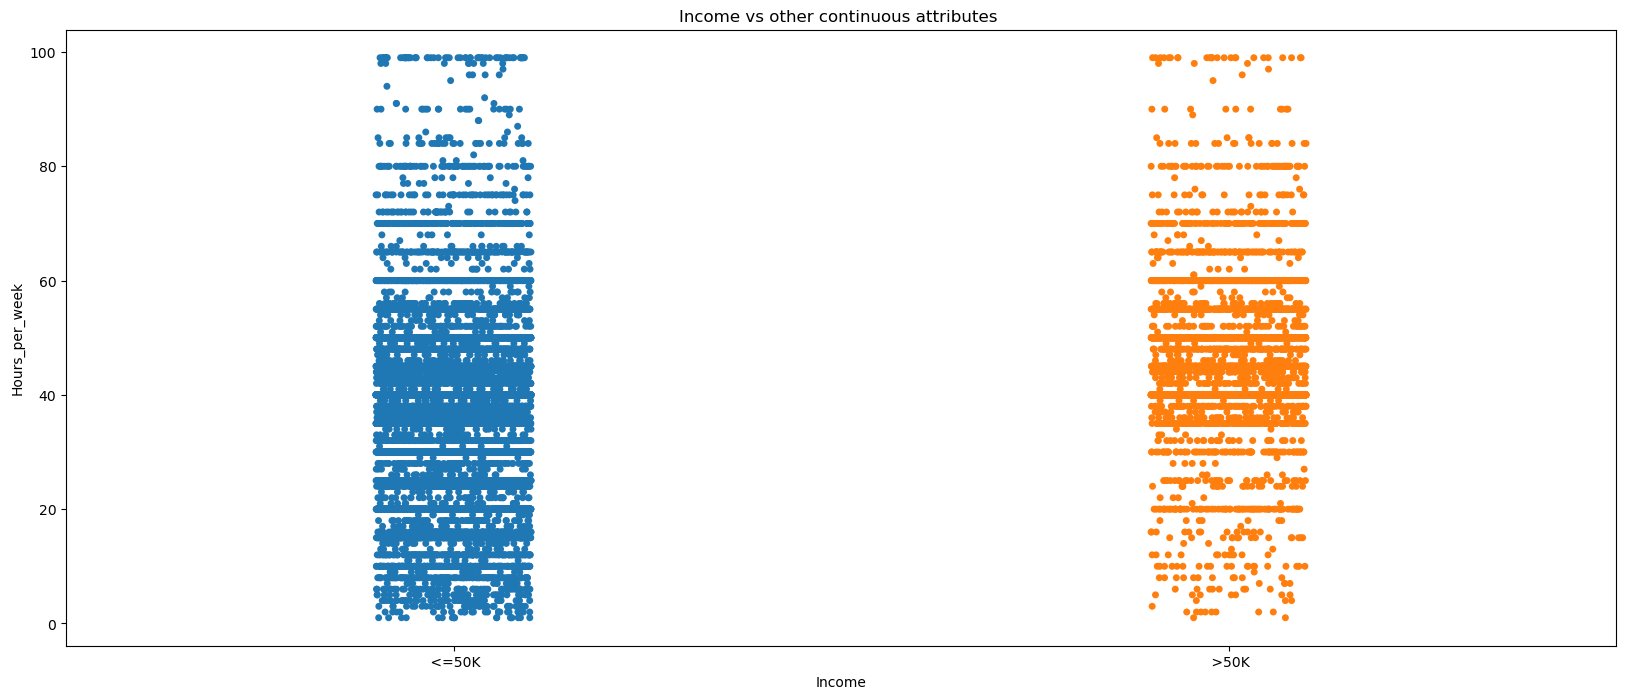

In [29]:
for i in continuous_cols:
    plt.figure(figsize=(20,8))
    ax=sns.stripplot(df['Income'],df[i])
    ax.set(xlabel = 'Income', ylabel = i)
    plt.title('Income vs other continuous attributes ')
    plt.show()

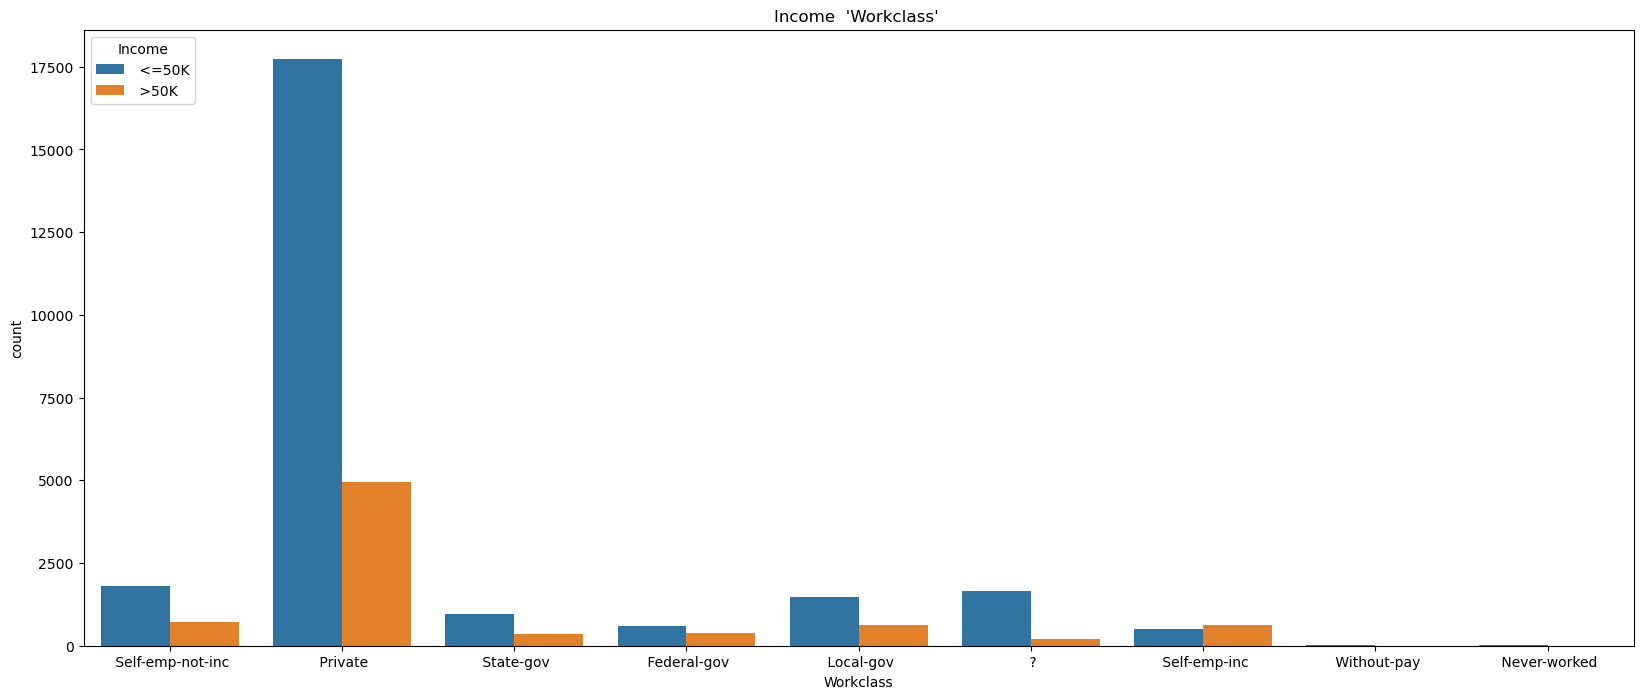

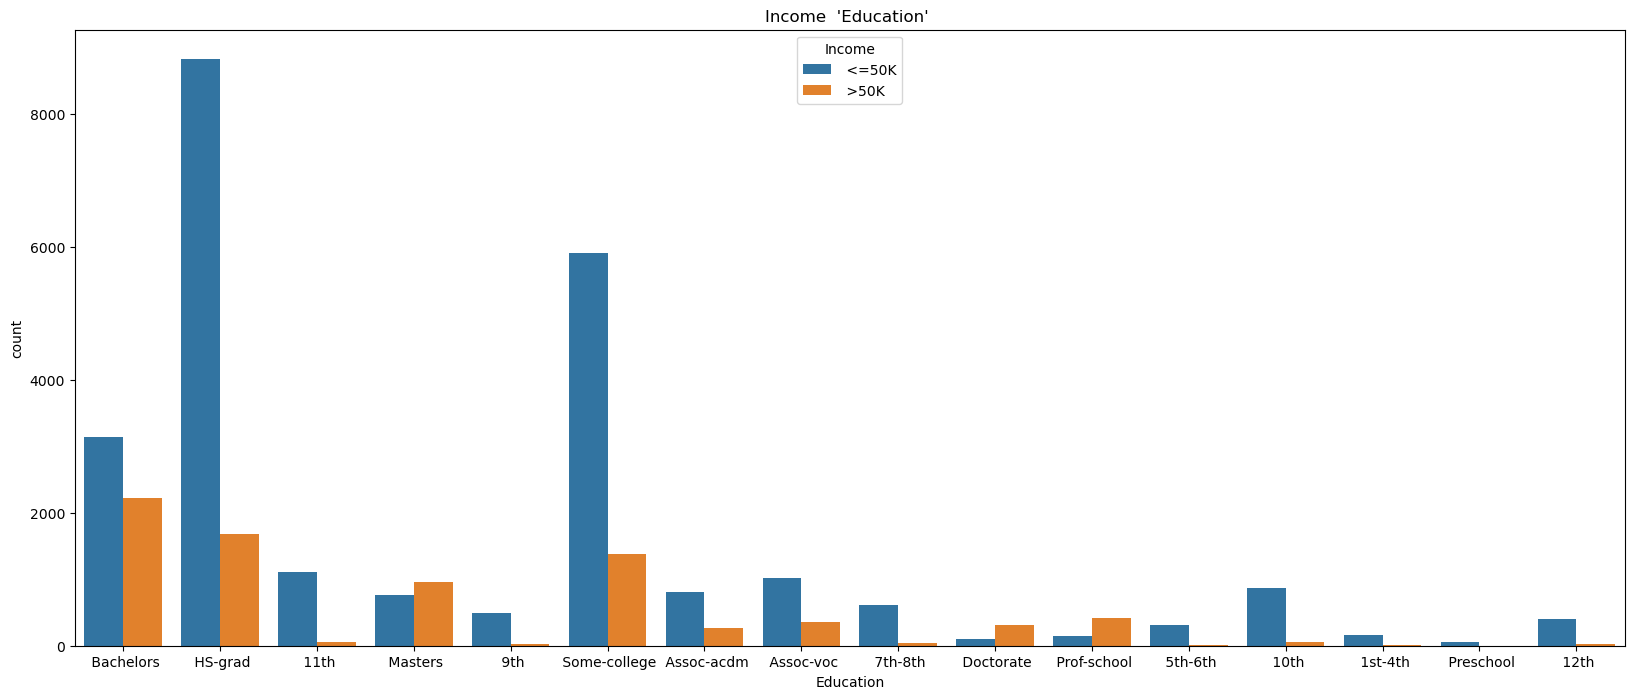

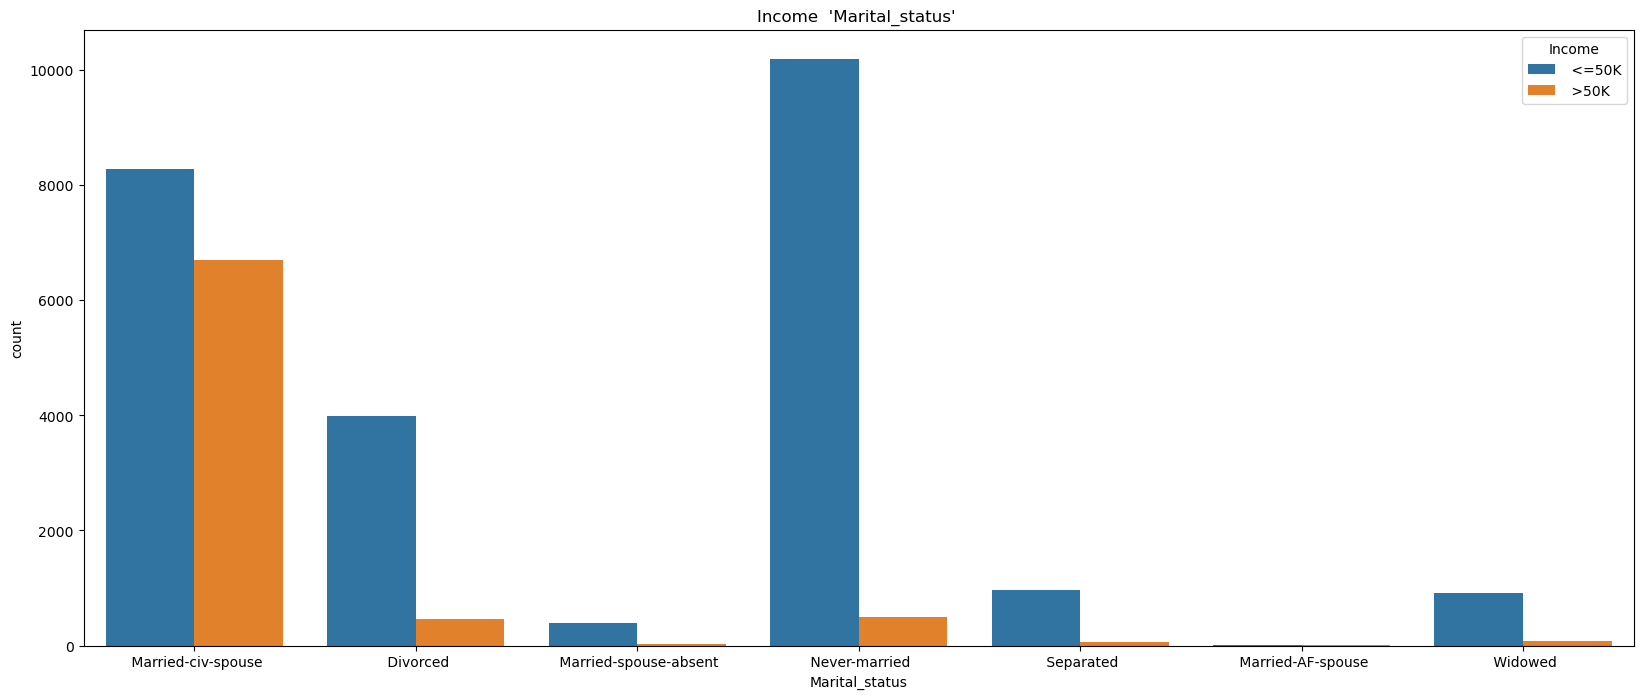

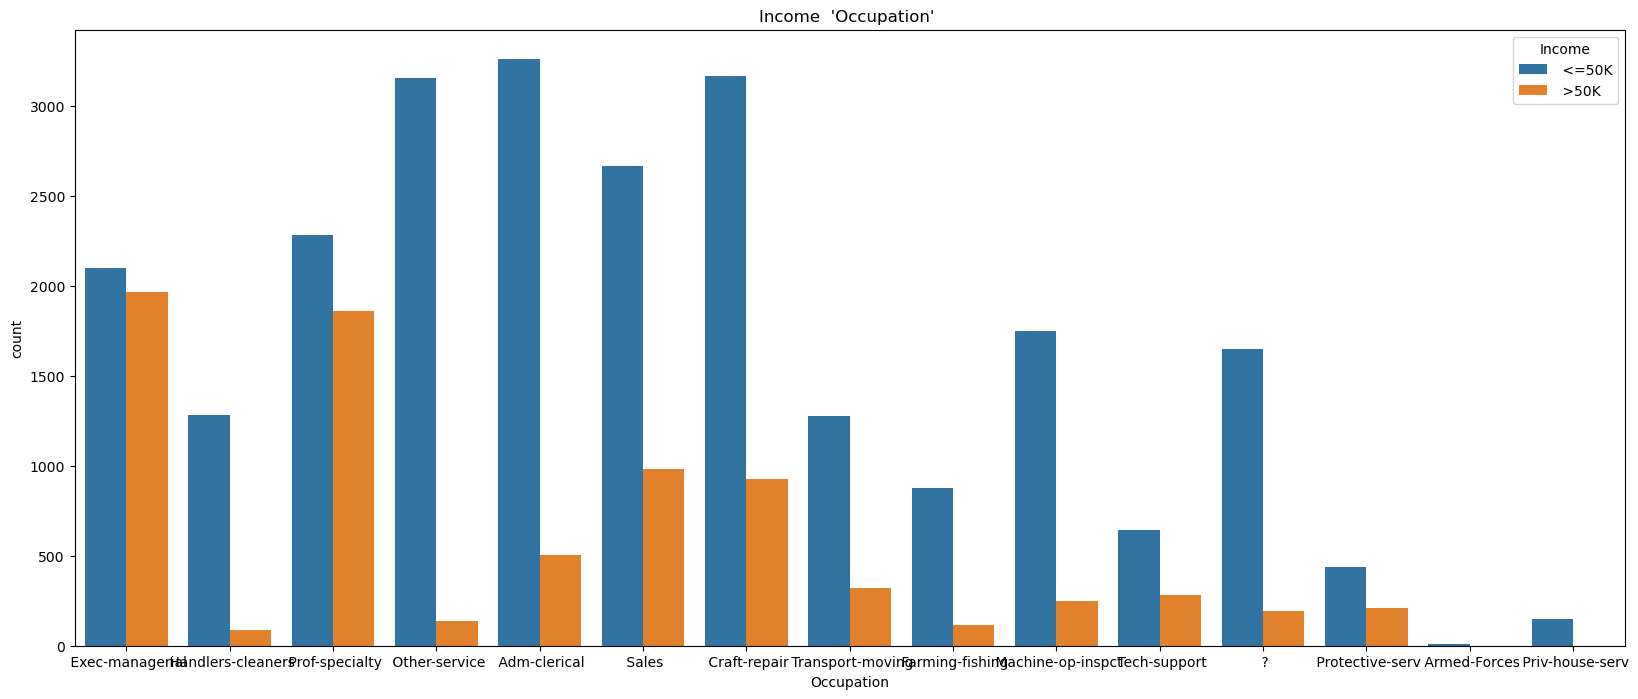

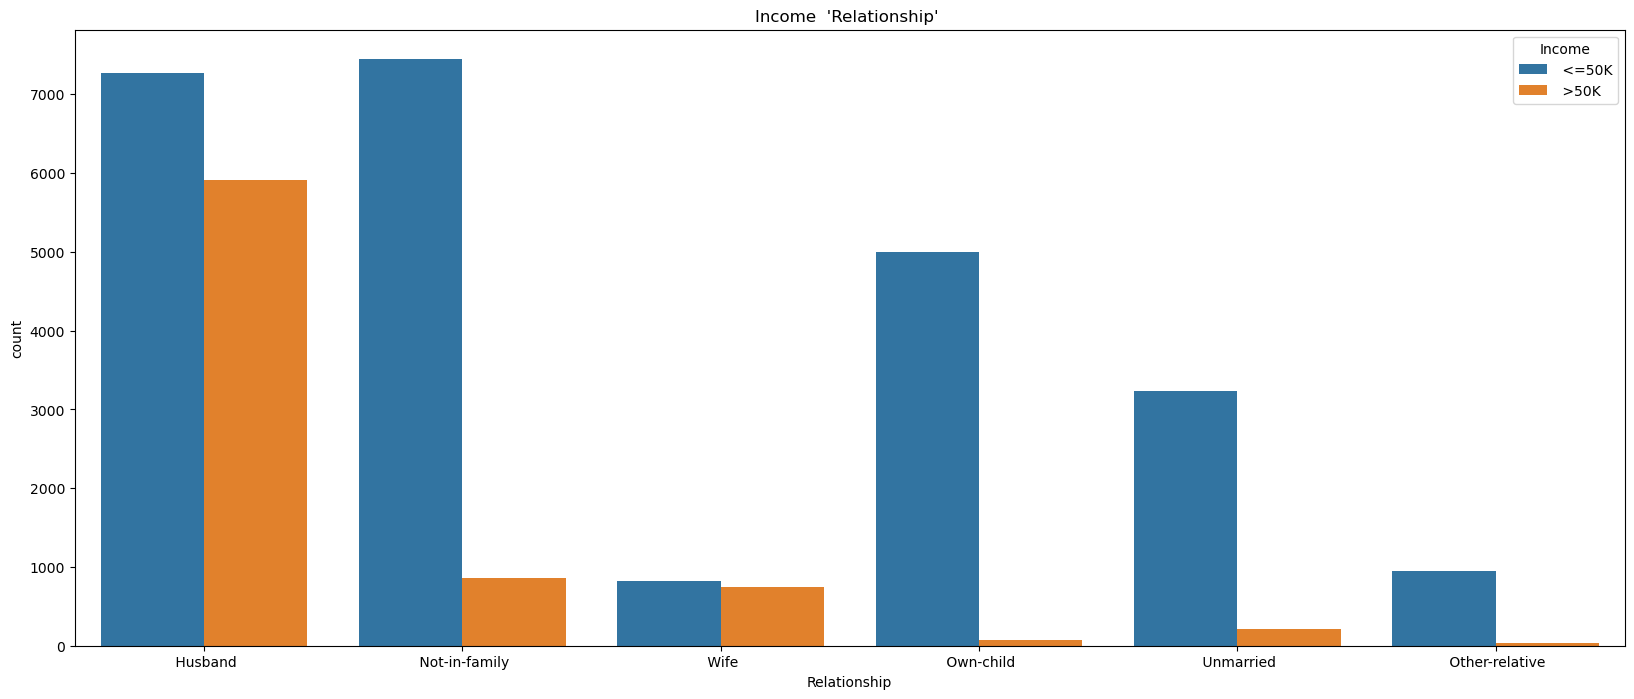

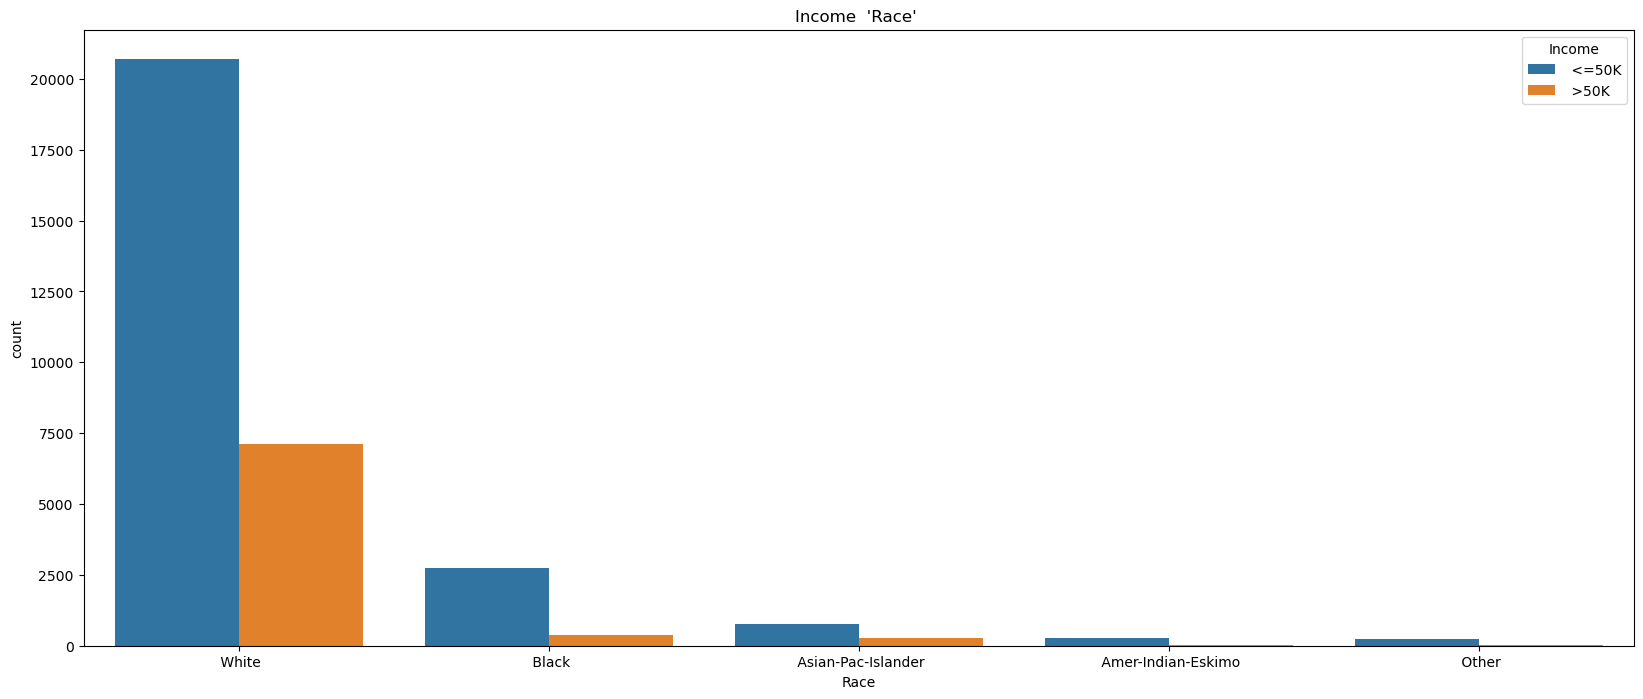

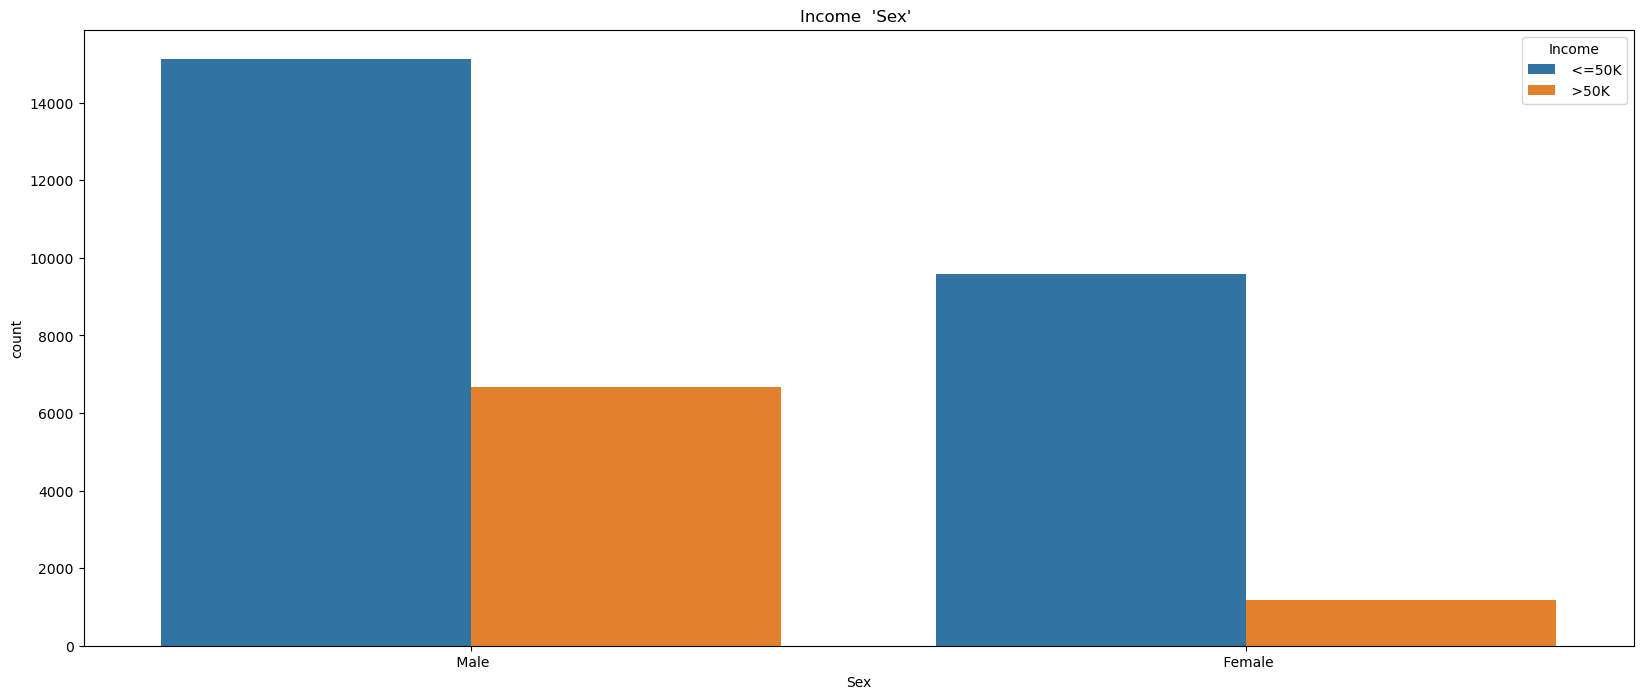

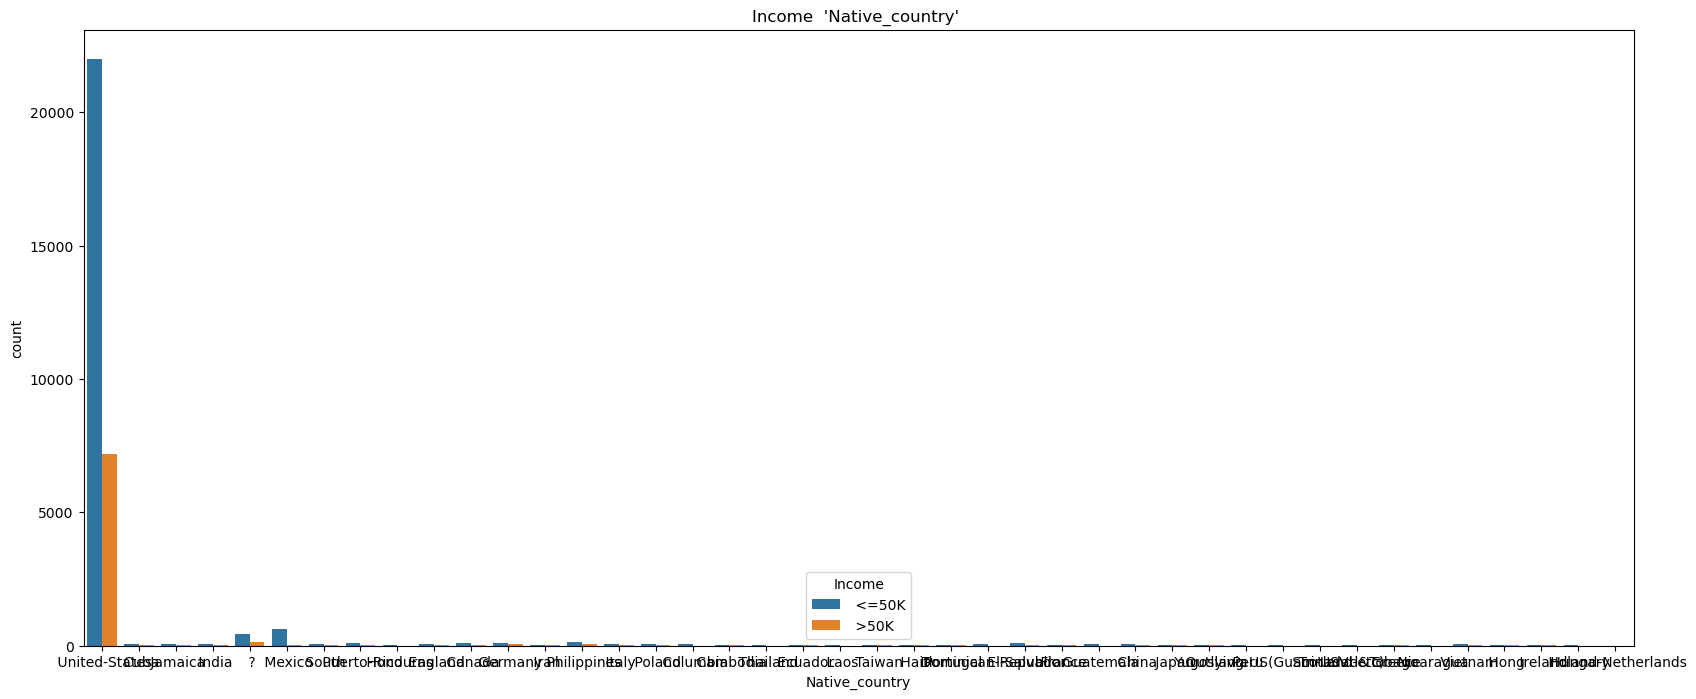

In [30]:
for i in categorical_cols[:-1]:
    plt.figure(figsize=(20,8))
    plt.title("Income  '%s' "%i)
    sns.countplot(df[i],hue=df['Income'])

self employed people are the only ones in workclass column who seems to have more  50k + earners and less <= 50k earners.


while in education column , master ,doctrate and prof-school are the only ones which have 50k +  earners and less <=50k earners.

people who are married irrespective of relationship (husband  or wife ) seems  to have higher chancer to earning over 50k.

In [31]:
df['Income'].replace('<=50k',0,inplace = True)
df['Income'].replace('>50k',1,inplace = True)

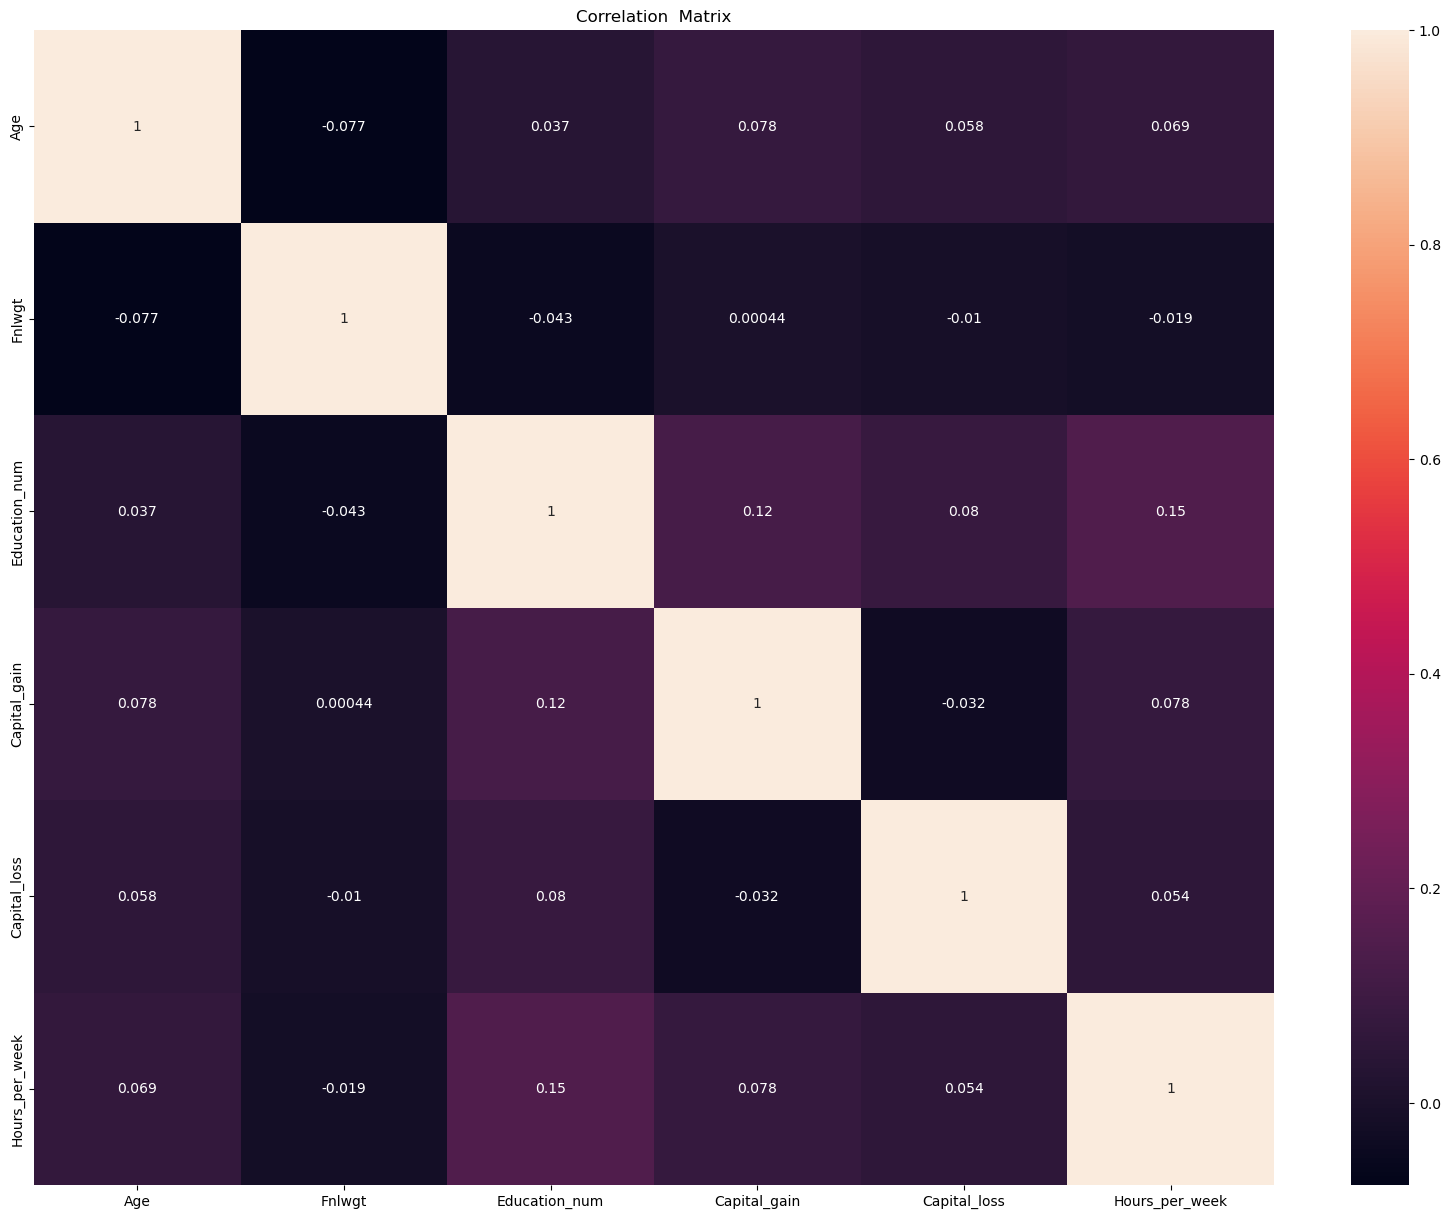

In [32]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr() , annot = True)
plt.title('Correlation  Matrix')
plt.show()

Education seems to be most correlated with income , apart from the  Age, Hours_per_week and Capital_gain are also very much correalted with income 0.23,0.23 and 0.22 respectively .
 final weight seems to be least correlated with income at -0.01.

# Outliers and skewness 

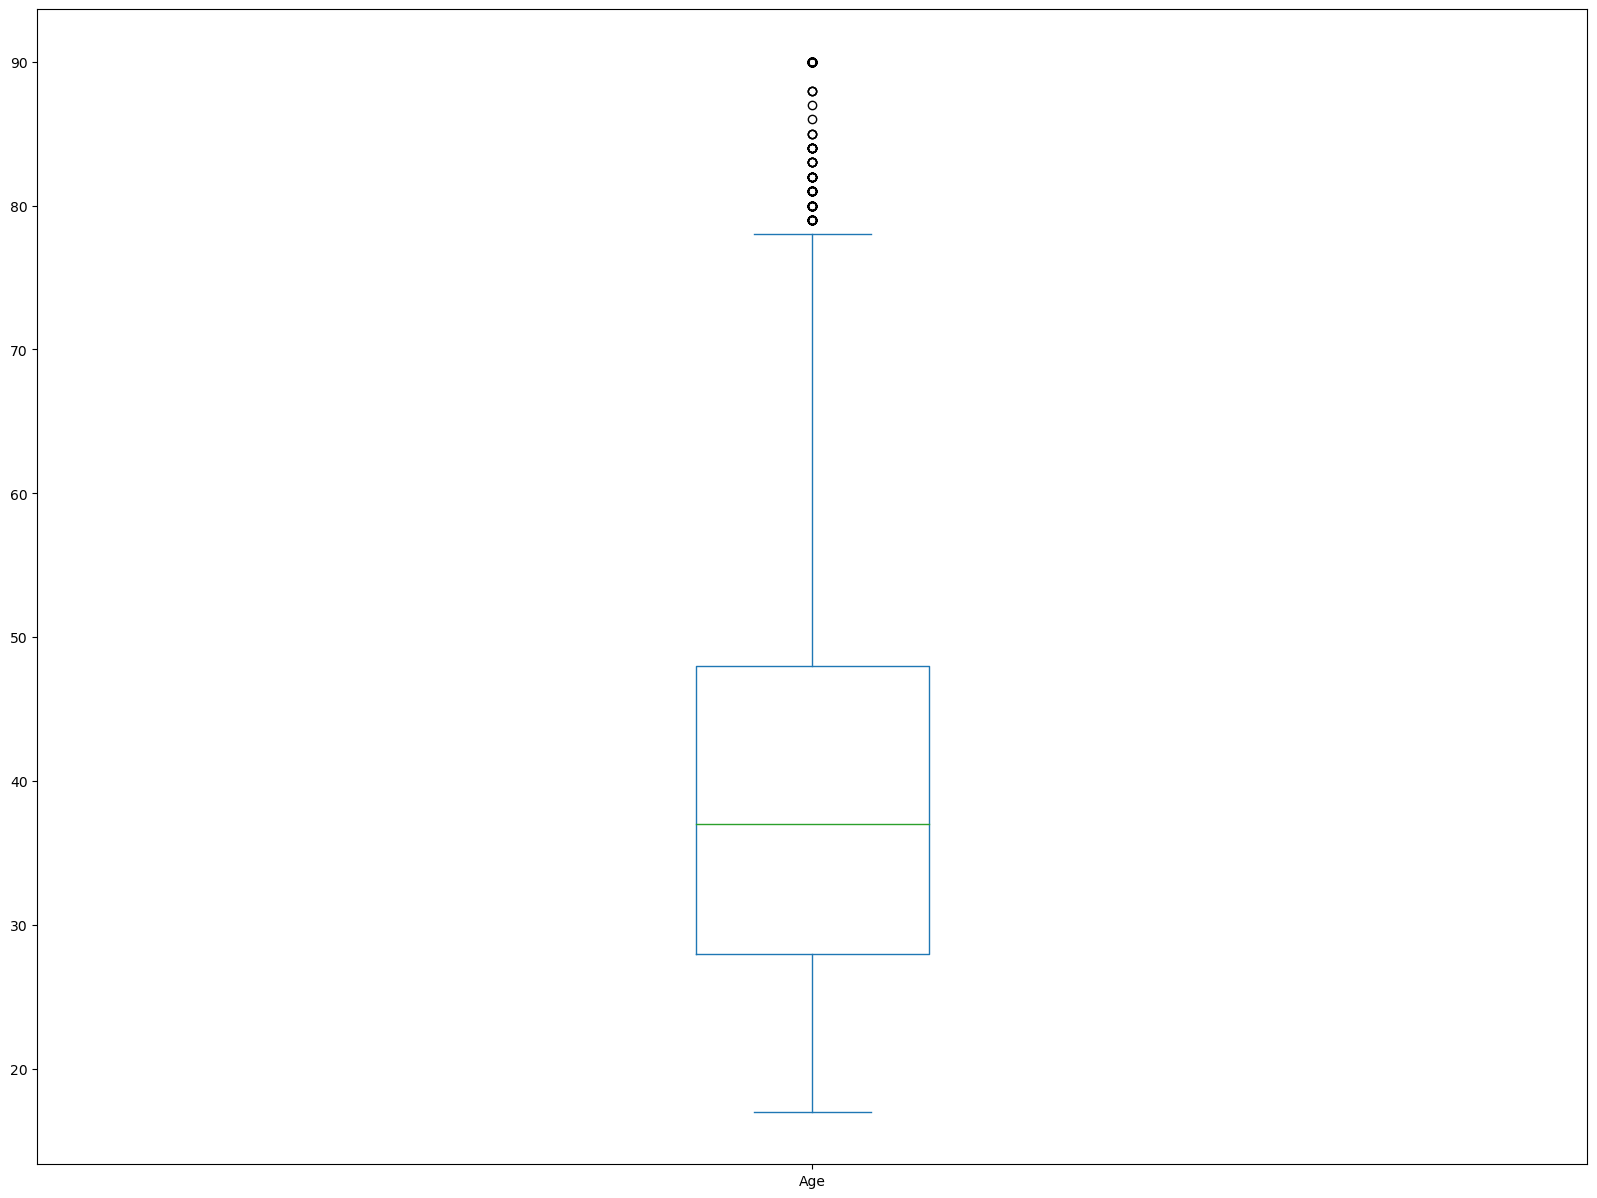

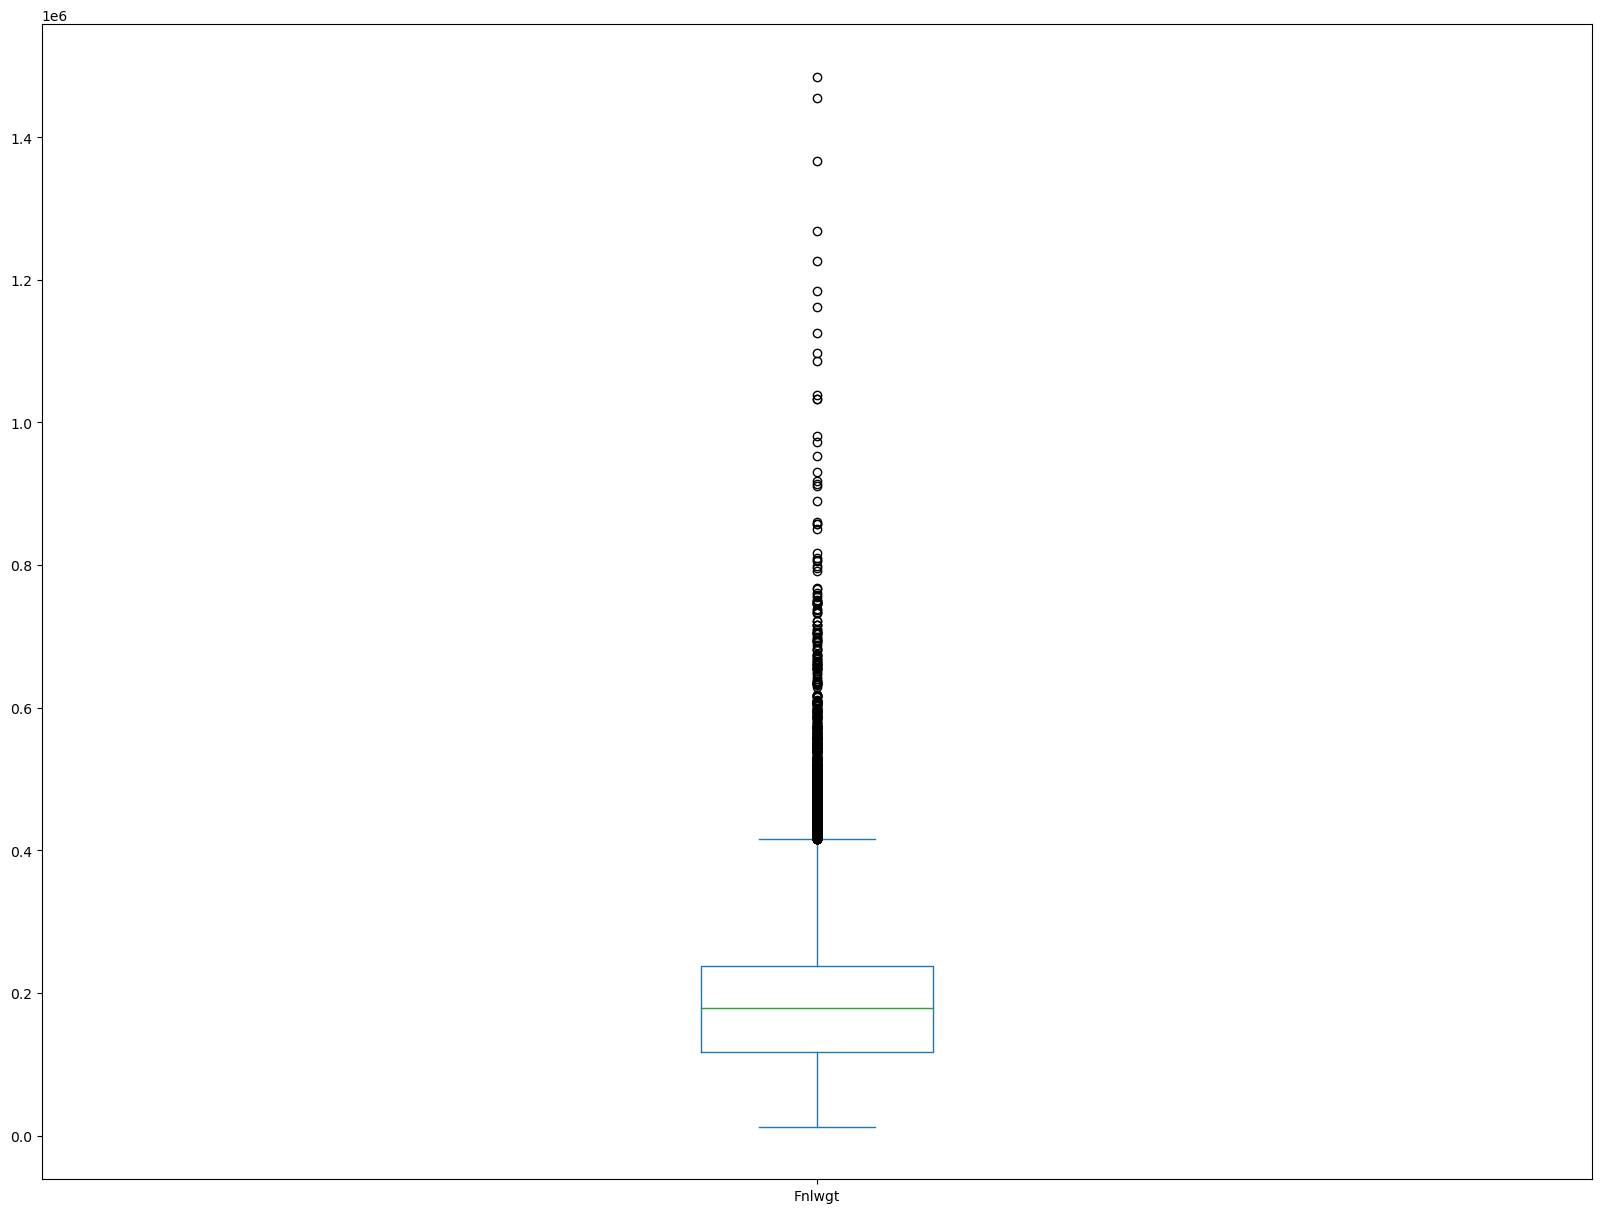

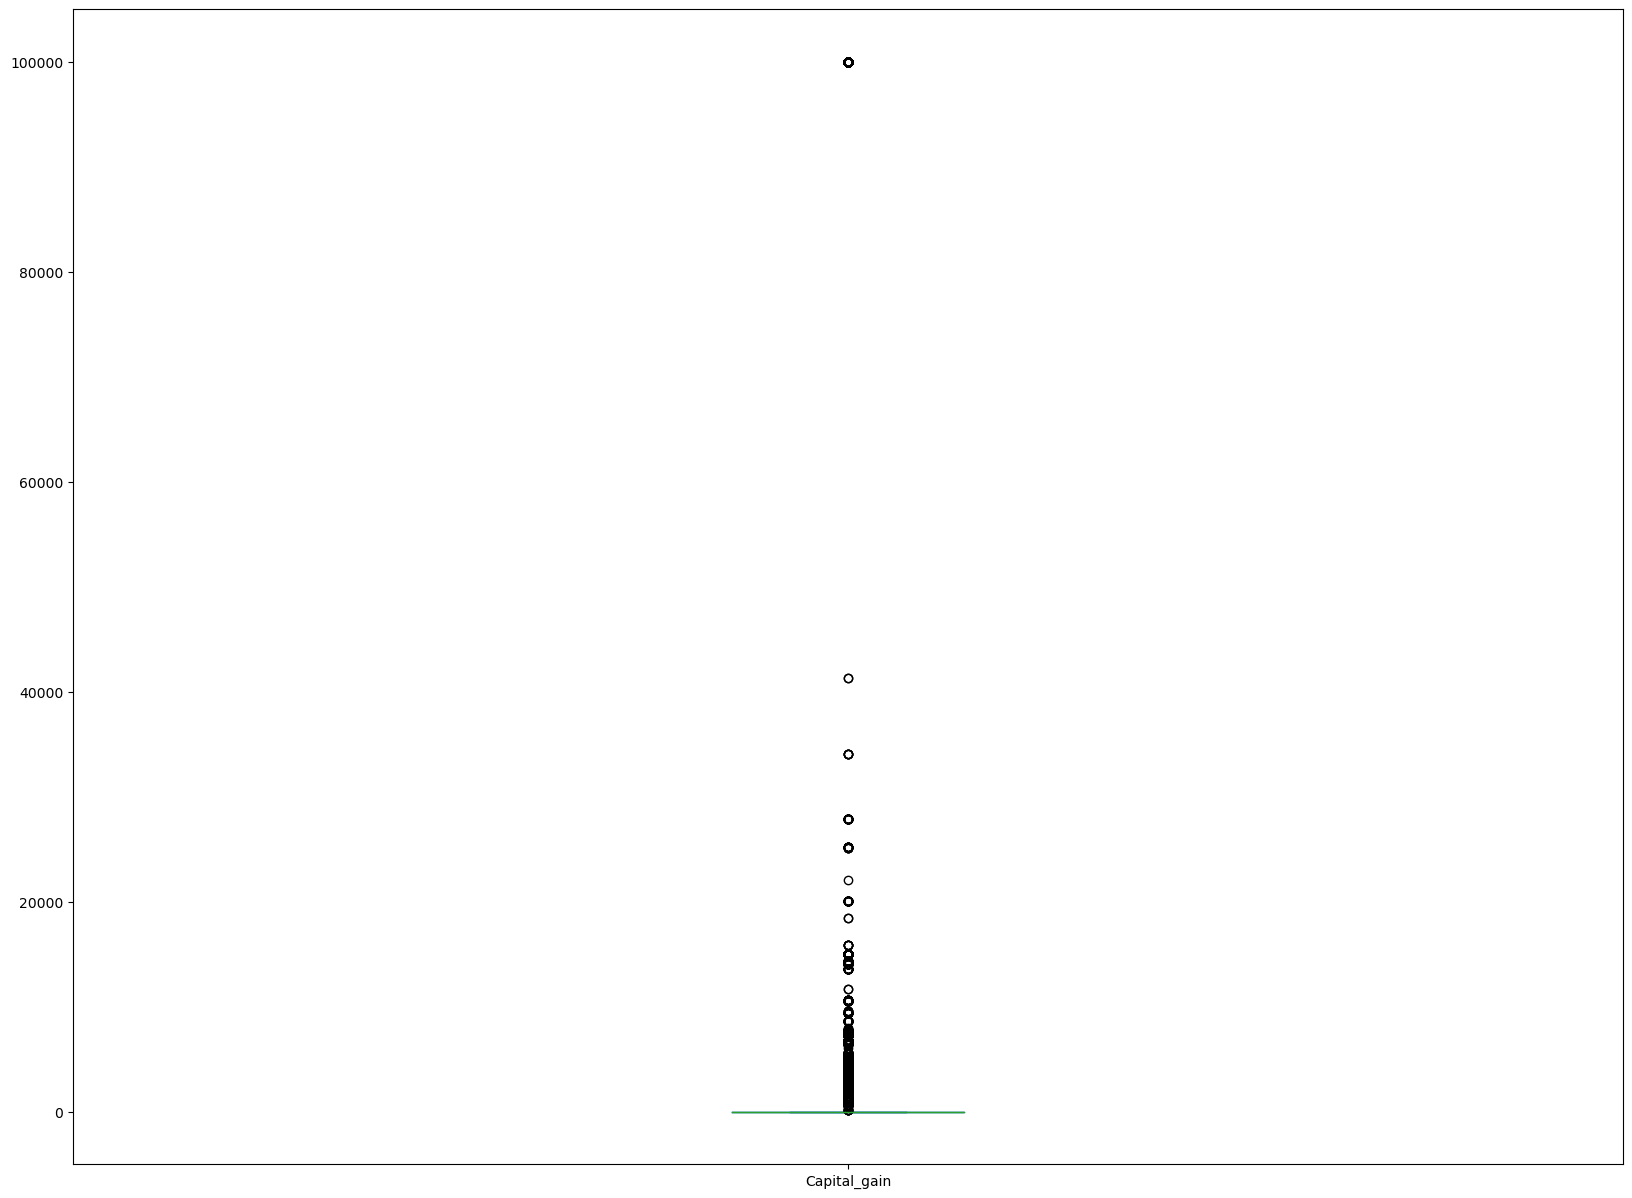

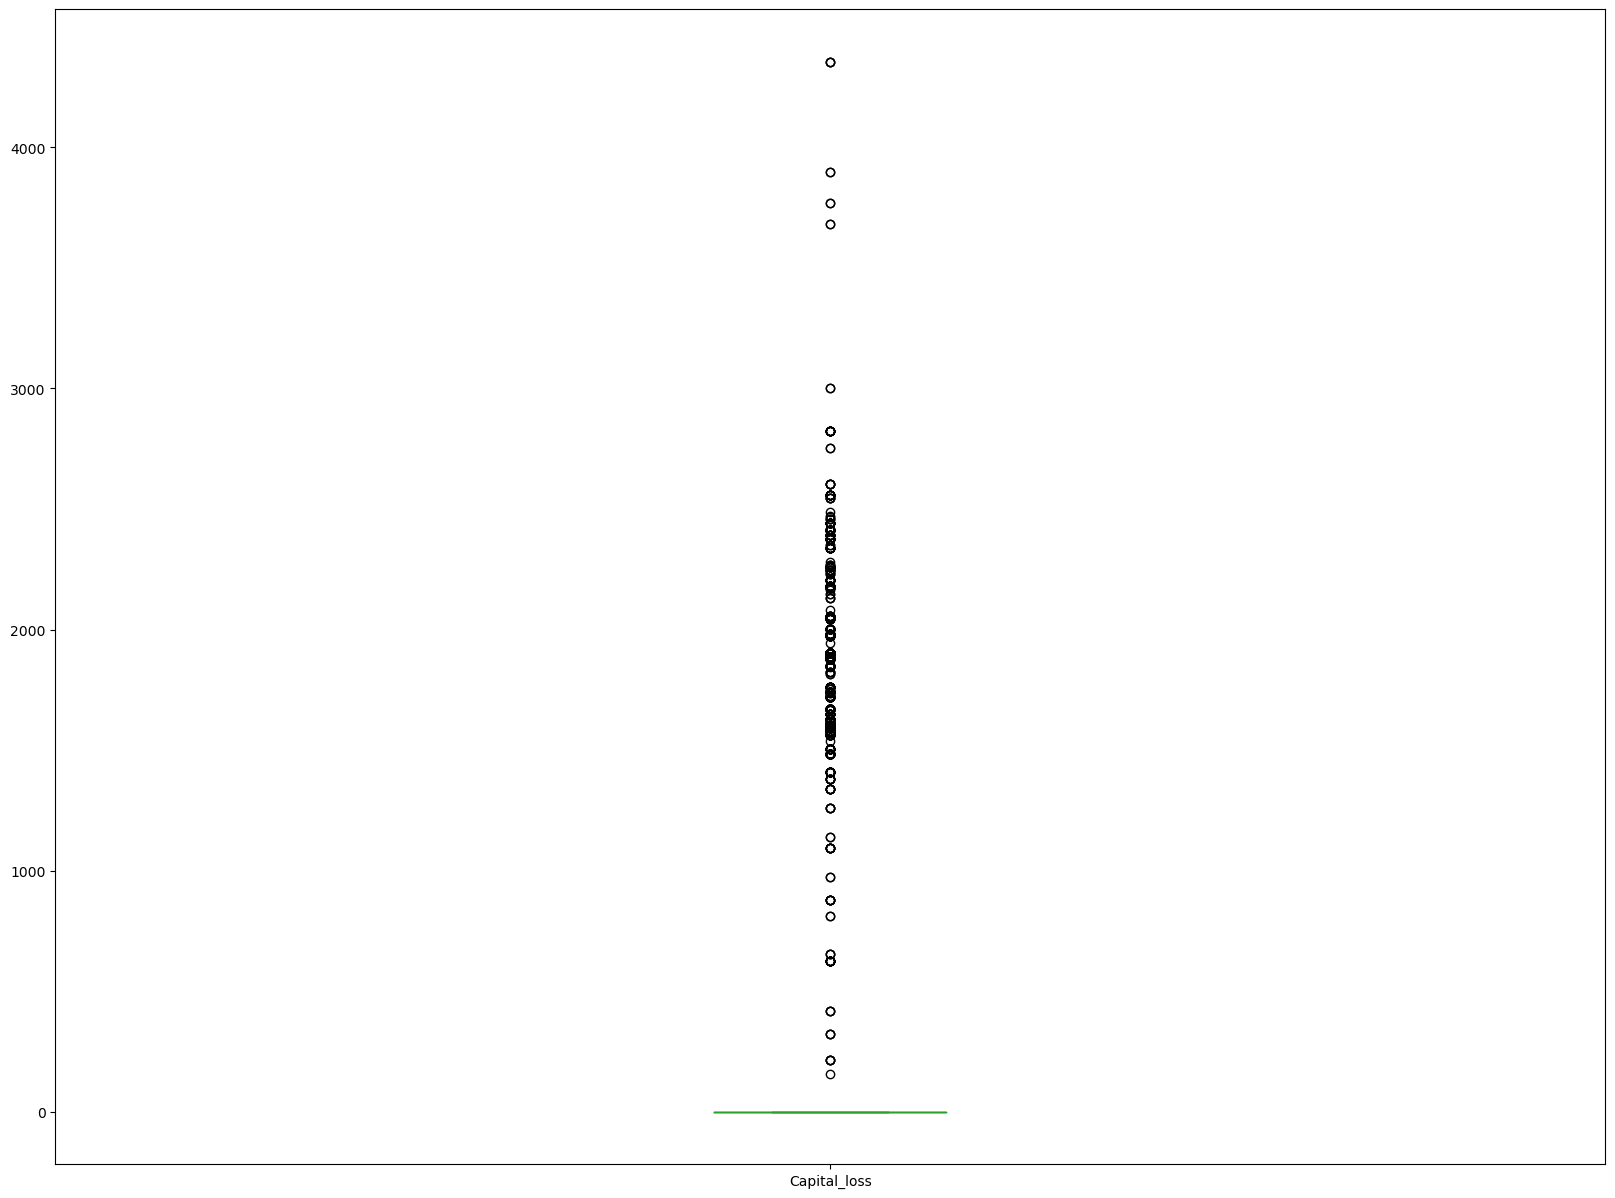

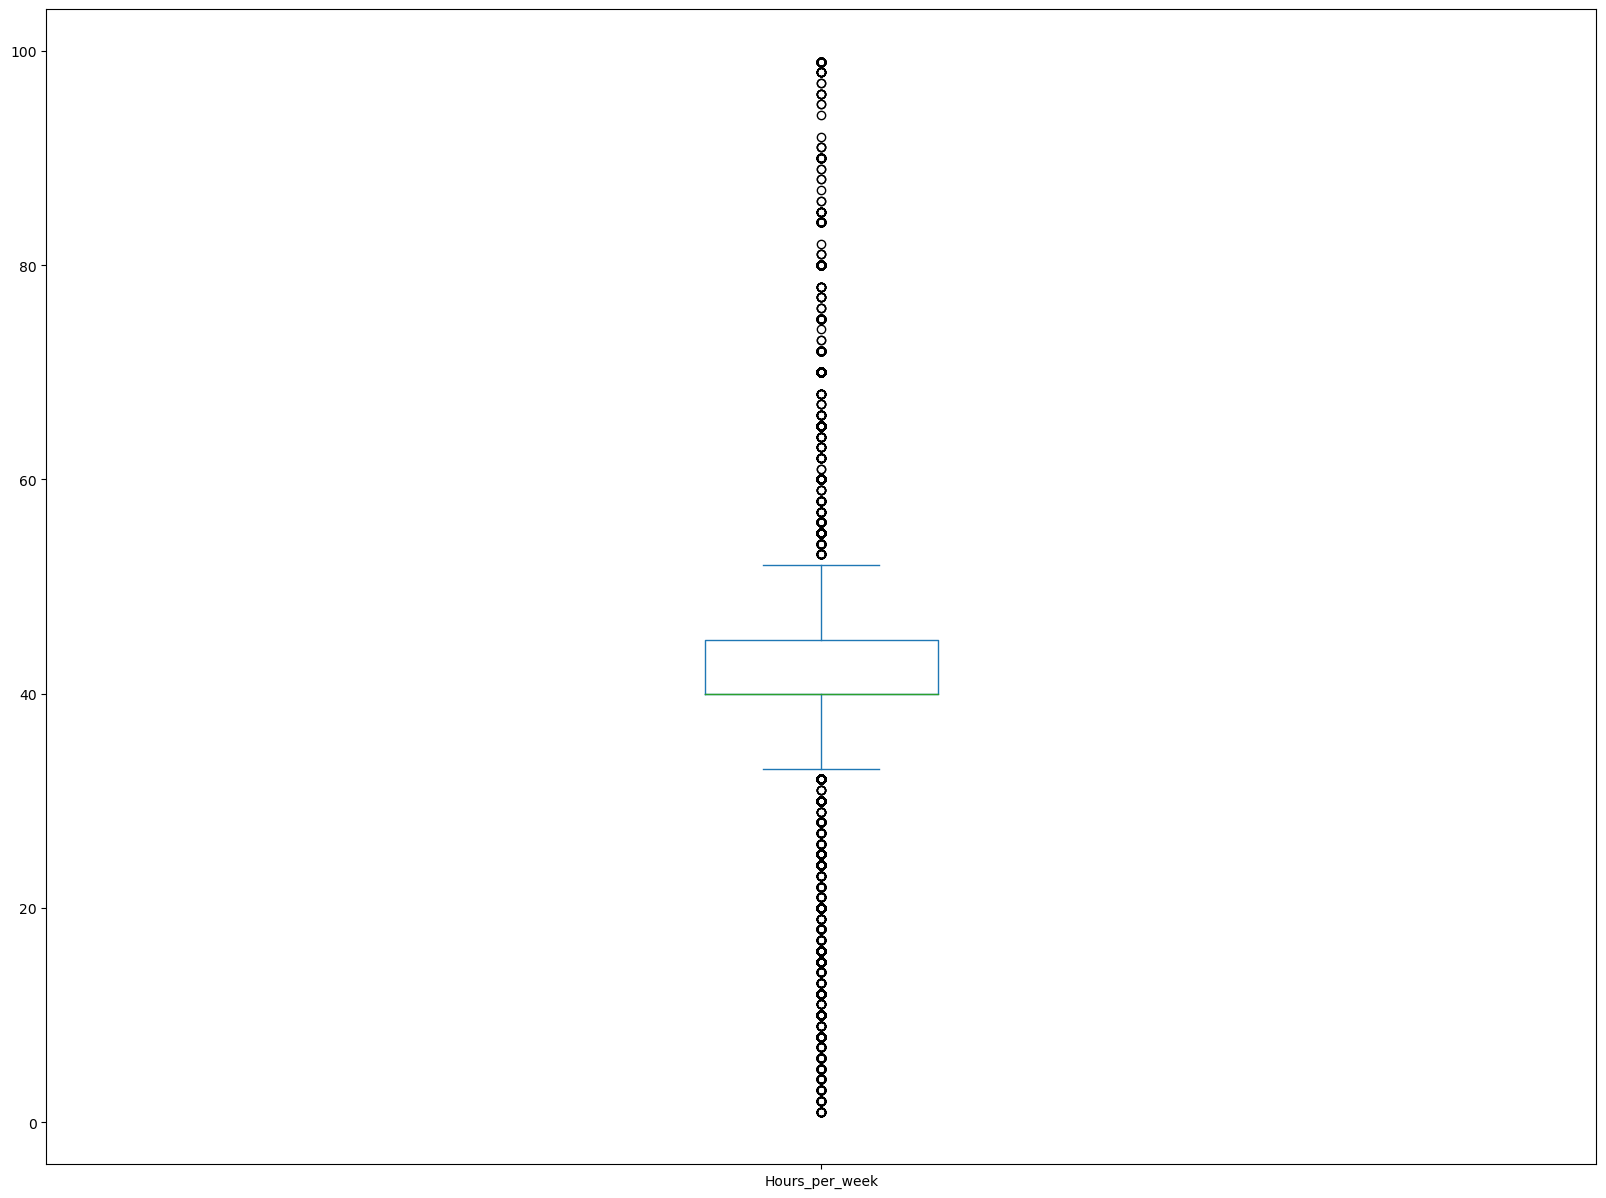

In [33]:
for i in continuous_cols:
    plt.figure(figsize = (20,15))
    df[i].plot.box()

In [34]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [35]:
continuous_cols.remove('Age')
continuous_cols.remove('Hours_per_week')

In [36]:
df_new = df

In [37]:
from sklearn.preprocessing import power_transform
df_new[continuous_cols]= power_transform(df[continuous_cols],method='yeo-johnson')
df_new = pd.DataFrame(df_new,columns=df.columns)

In [38]:
df_new.skew()

Age               0.558738
Fnlwgt            0.016914
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
dtype: float64

Skewness has been removed but still it is very high

In [39]:
s = (df.dtypes == 'object')
obj_cols = list(s[s].index)

print("Categorical variable:")
print(obj_cols)

Categorical variable:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [40]:
obj_cols.remove('Education')

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
for col in obj_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

Label Encoded all the object columns

In [42]:
df_new = df_new.drop('Education', axis=1)

education column dropped but Education_num is already present .

In [43]:
x=df_new.drop('Income', axis = 1)
y=df_new['Income']

# BEST RANDOM STATE

In [45]:
maxAccu=0
maxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu: 
        maxAccu = acc
        maxRs = i
        print('Max Accuracy obtained is ',maxAccu,'on Random State', maxRS)

Max Accuracy obtained is  0.8128583128583129 on Random State 0
Max Accuracy obtained is  0.8170556920556921 on Random State 0
Max Accuracy obtained is  0.8191031941031941 on Random State 0
Max Accuracy obtained is  0.8204340704340705 on Random State 0
Max Accuracy obtained is  0.8218673218673219 on Random State 0
Max Accuracy obtained is  0.822993447993448 on Random State 0
Max Accuracy obtained is  0.8238124488124489 on Random State 0
Max Accuracy obtained is  0.827088452088452 on Random State 0


# TRAIN TEST SPLIT

In [46]:
x_tarin,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=448)

In [47]:
LR = LogisticRegression()
NB = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
RF = RandomForestClassifier()
models = [LR,NB,DTC,svc,RF]
for i in models:
    print(i)
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

LogisticRegression()
0.7692465192465192
[[7514    0]
 [2254    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7514
           1       0.00      0.00      0.00      2254

    accuracy                           0.77      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.59      0.77      0.67      9768

GaussianNB()
0.7692465192465192
[[7514    0]
 [2254    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7514
           1       0.00      0.00      0.00      2254

    accuracy                           0.77      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.59      0.77      0.67      9768

DecisionTreeClassifier()
0.6328828828828829
[[5641 1873]
 [1713  541]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      7514
           1       0.22      0.24      0

In [48]:
for i in models:
    cvs = cross_val_score(i,x,y,cv = 5)
    print('Cross Validation Score for ',i, 'model is:',cvs.mean())

Cross Validation Score for  LogisticRegression() model is: 0.8139127764127764
Cross Validation Score for  GaussianNB() model is: 0.8102272727272728
Cross Validation Score for  DecisionTreeClassifier() model is: 0.8018120393120395
Cross Validation Score for  SVC() model is: 0.8196867321867322
Cross Validation Score for  RandomForestClassifier() model is: 0.852027027027027


all models have very low  difference between acuracy score and cross val score , hence we will go with Random Forest Model since its accuracy is highest.

# Hyperparameter tuning 

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {'n_estimators':[200,500],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['ginni','entropy']}

In [ ]:
rfc = GridSearchCV(estimator=RF,param_grid=param_grid, cv =3)
rfc.fit(x_train,y_train)

In [75]:
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 500}

In [77]:
rfc1 = RandomForestClassifier(random_state=448,max_features='sqrt',n_estimators =200, max_depth=8,criterion='entropy')
rfc1.fit(x_train,y_train)
predrfc1 = rfc1.predict(x_test)
print(accuracy_score(y_test,predrfc1))
print(confusion_matrix(y_test,predrfc1))
print(classification_report(y_test, predrfc1))

0.7691441441441441
[[7513    1]
 [2254    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7514
           1       0.00      0.00      0.00      2254

    accuracy                           0.77      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.59      0.77      0.67      9768



In [79]:
cvs = cross_val_score(rfc1,x,y,cv = 5)
print('Cross Validation Score for ',rfc1,'model is:',cvs.mean())

Cross Validation Score for  RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200, random_state=448) model is: 0.8513513513513512


there is not much improve 

In [80]:
import pickle
filename = 'CensusIncomeRfc.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [81]:
loaded_model = pickle.load(open('CensusIncomeRfc.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7692465192465192


In [82]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],predrfc1[:]],index=['Predicted','Original'])

In [83]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
